In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import set_printoptions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

In [3]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [3]:
data = pd.read_csv(r"C:\Users\bubbY\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [90]:
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [92]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# Duplicates

In [93]:
data[data.duplicated()].shape   #N0 DUPLICATES

(0, 35)

# Drop Columns

In [4]:
data_c1=data.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [11]:
data_c1.shape

(1470, 31)

# Missing Values

In [96]:
data_c1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Correlation Analysis

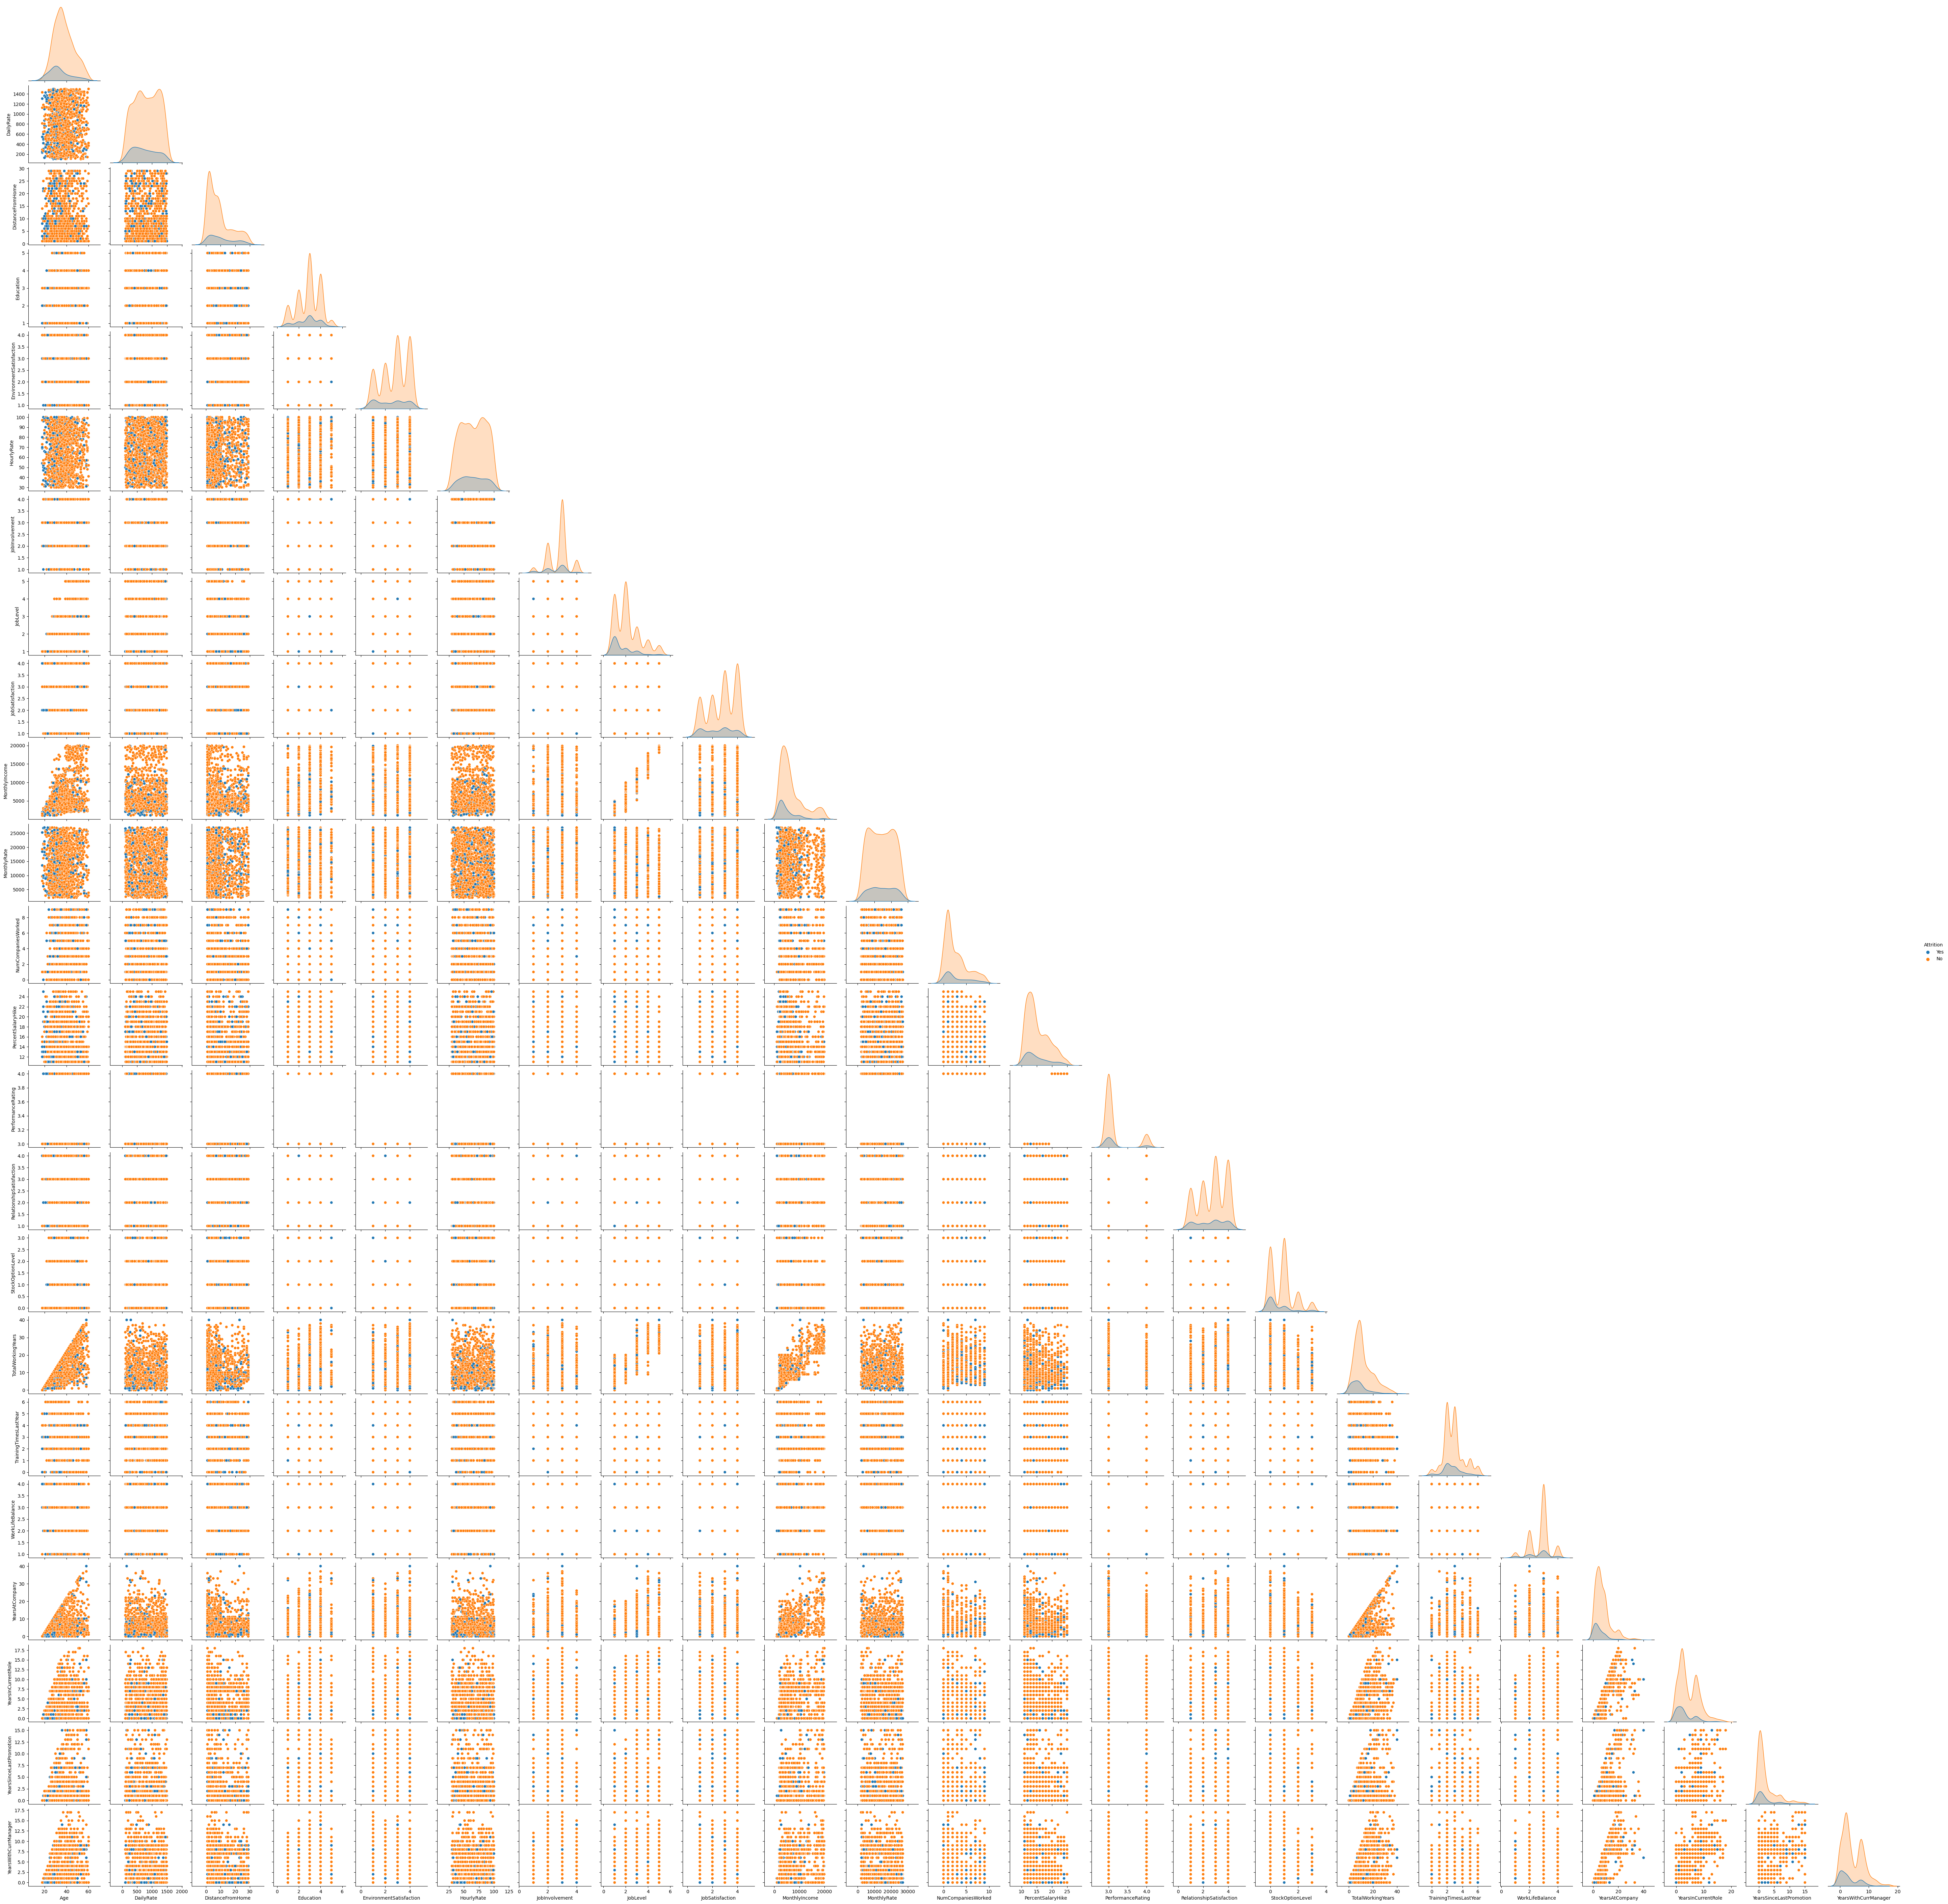

In [97]:
import seaborn as sns
sns.pairplot(data_c1,hue="Attrition",corner=True)

In [28]:
dataaaa=data

In [29]:
df_aa = dataaaa.copy()
df_aa['Target'] = df_aa['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_aa = df_aa.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_aa.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


<AxesSubplot:>

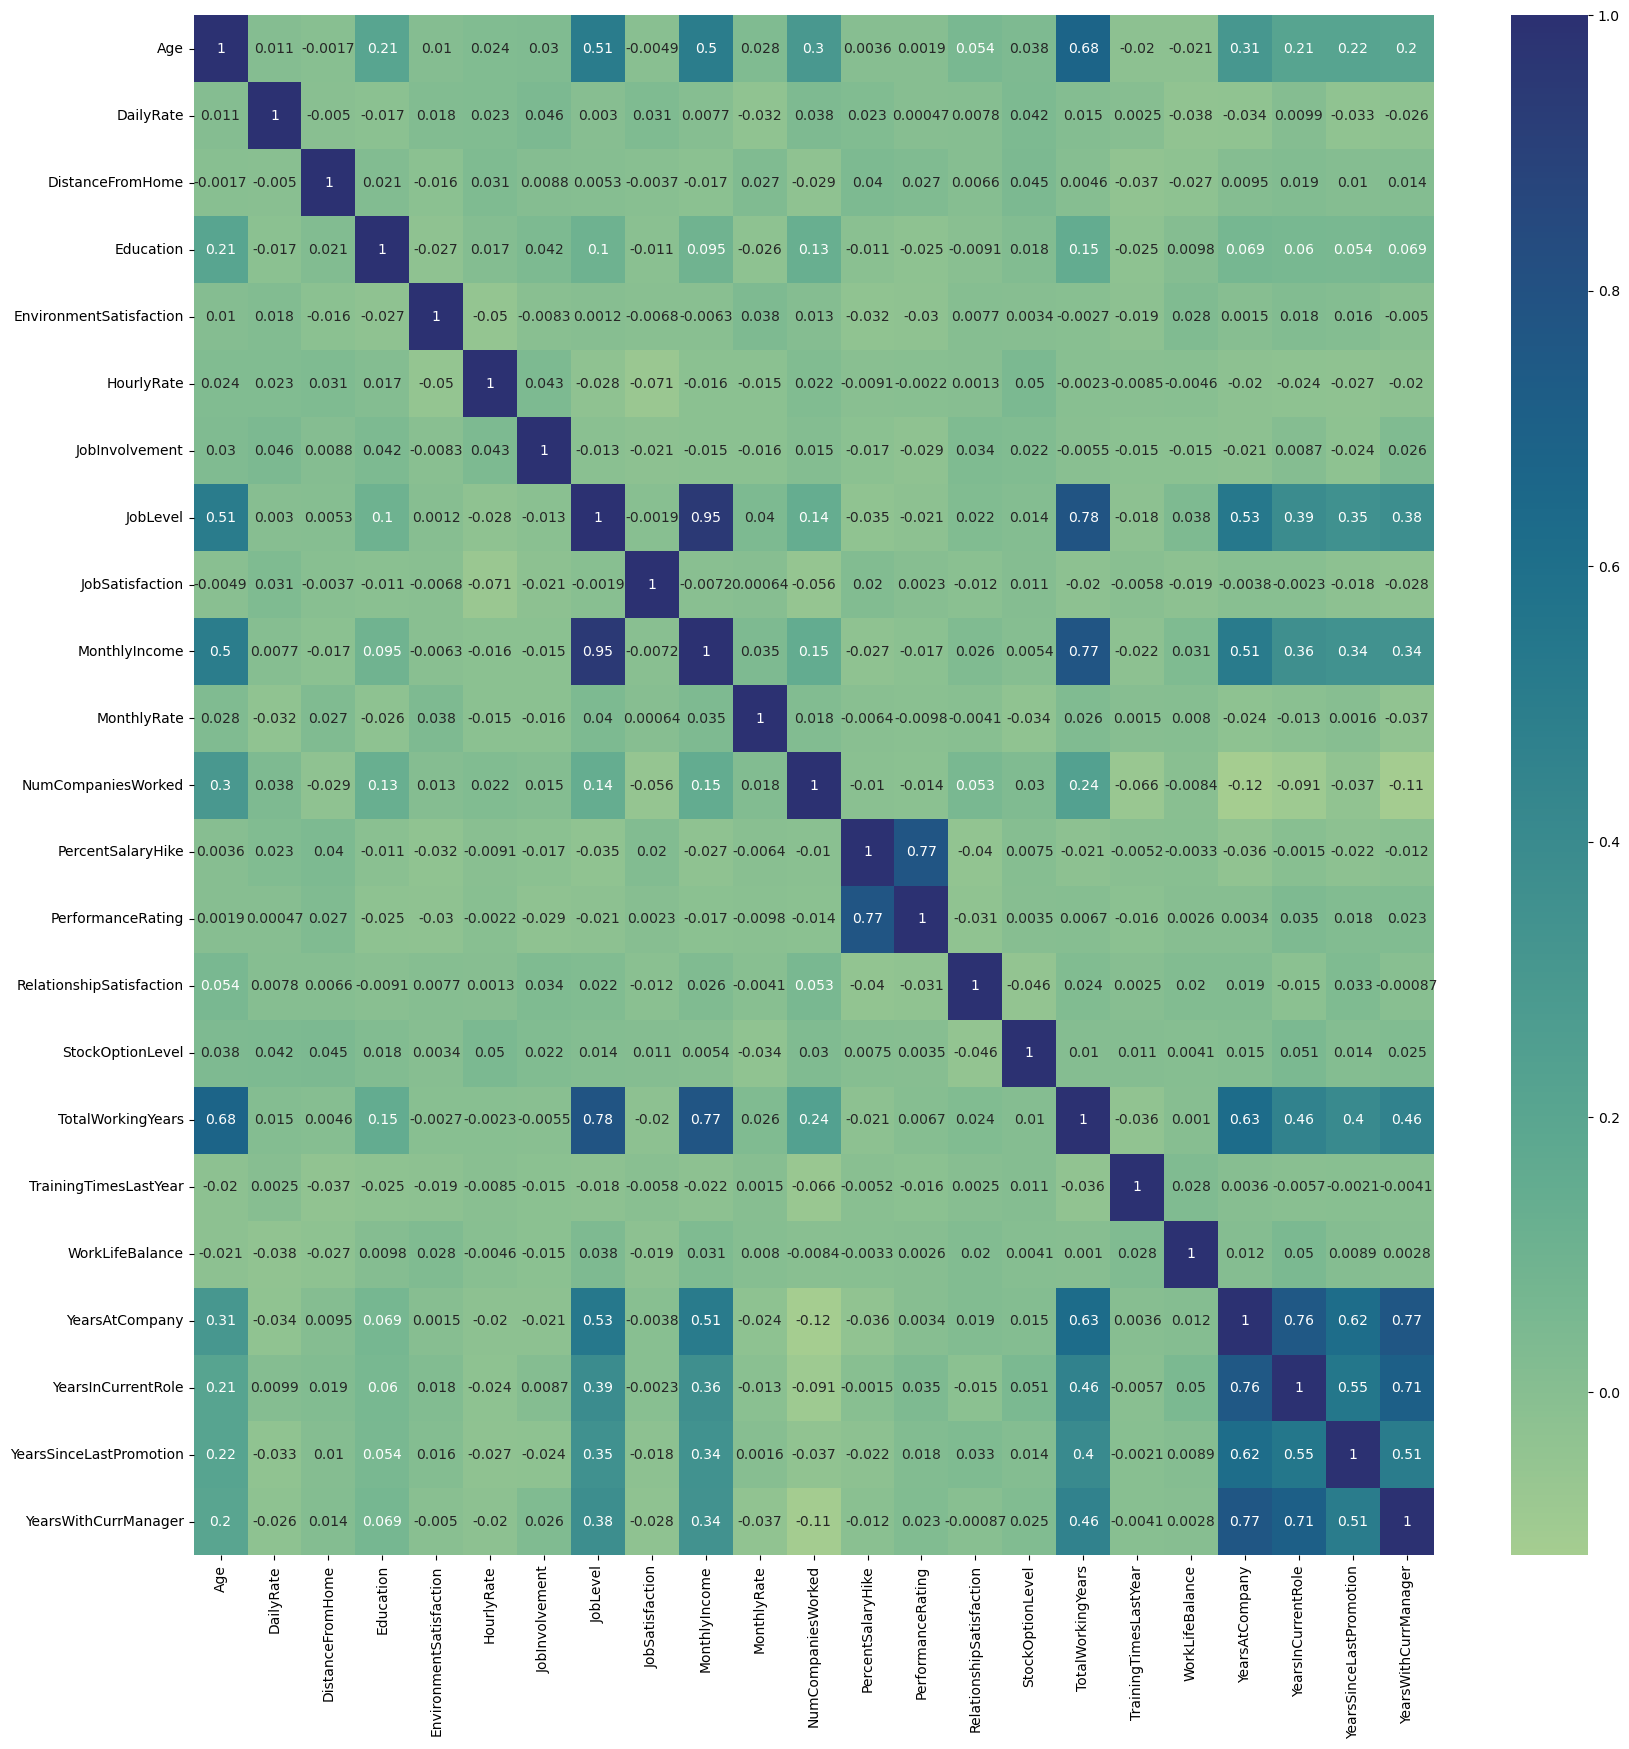

In [98]:
correlations = data_c1.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True, cmap="crest")

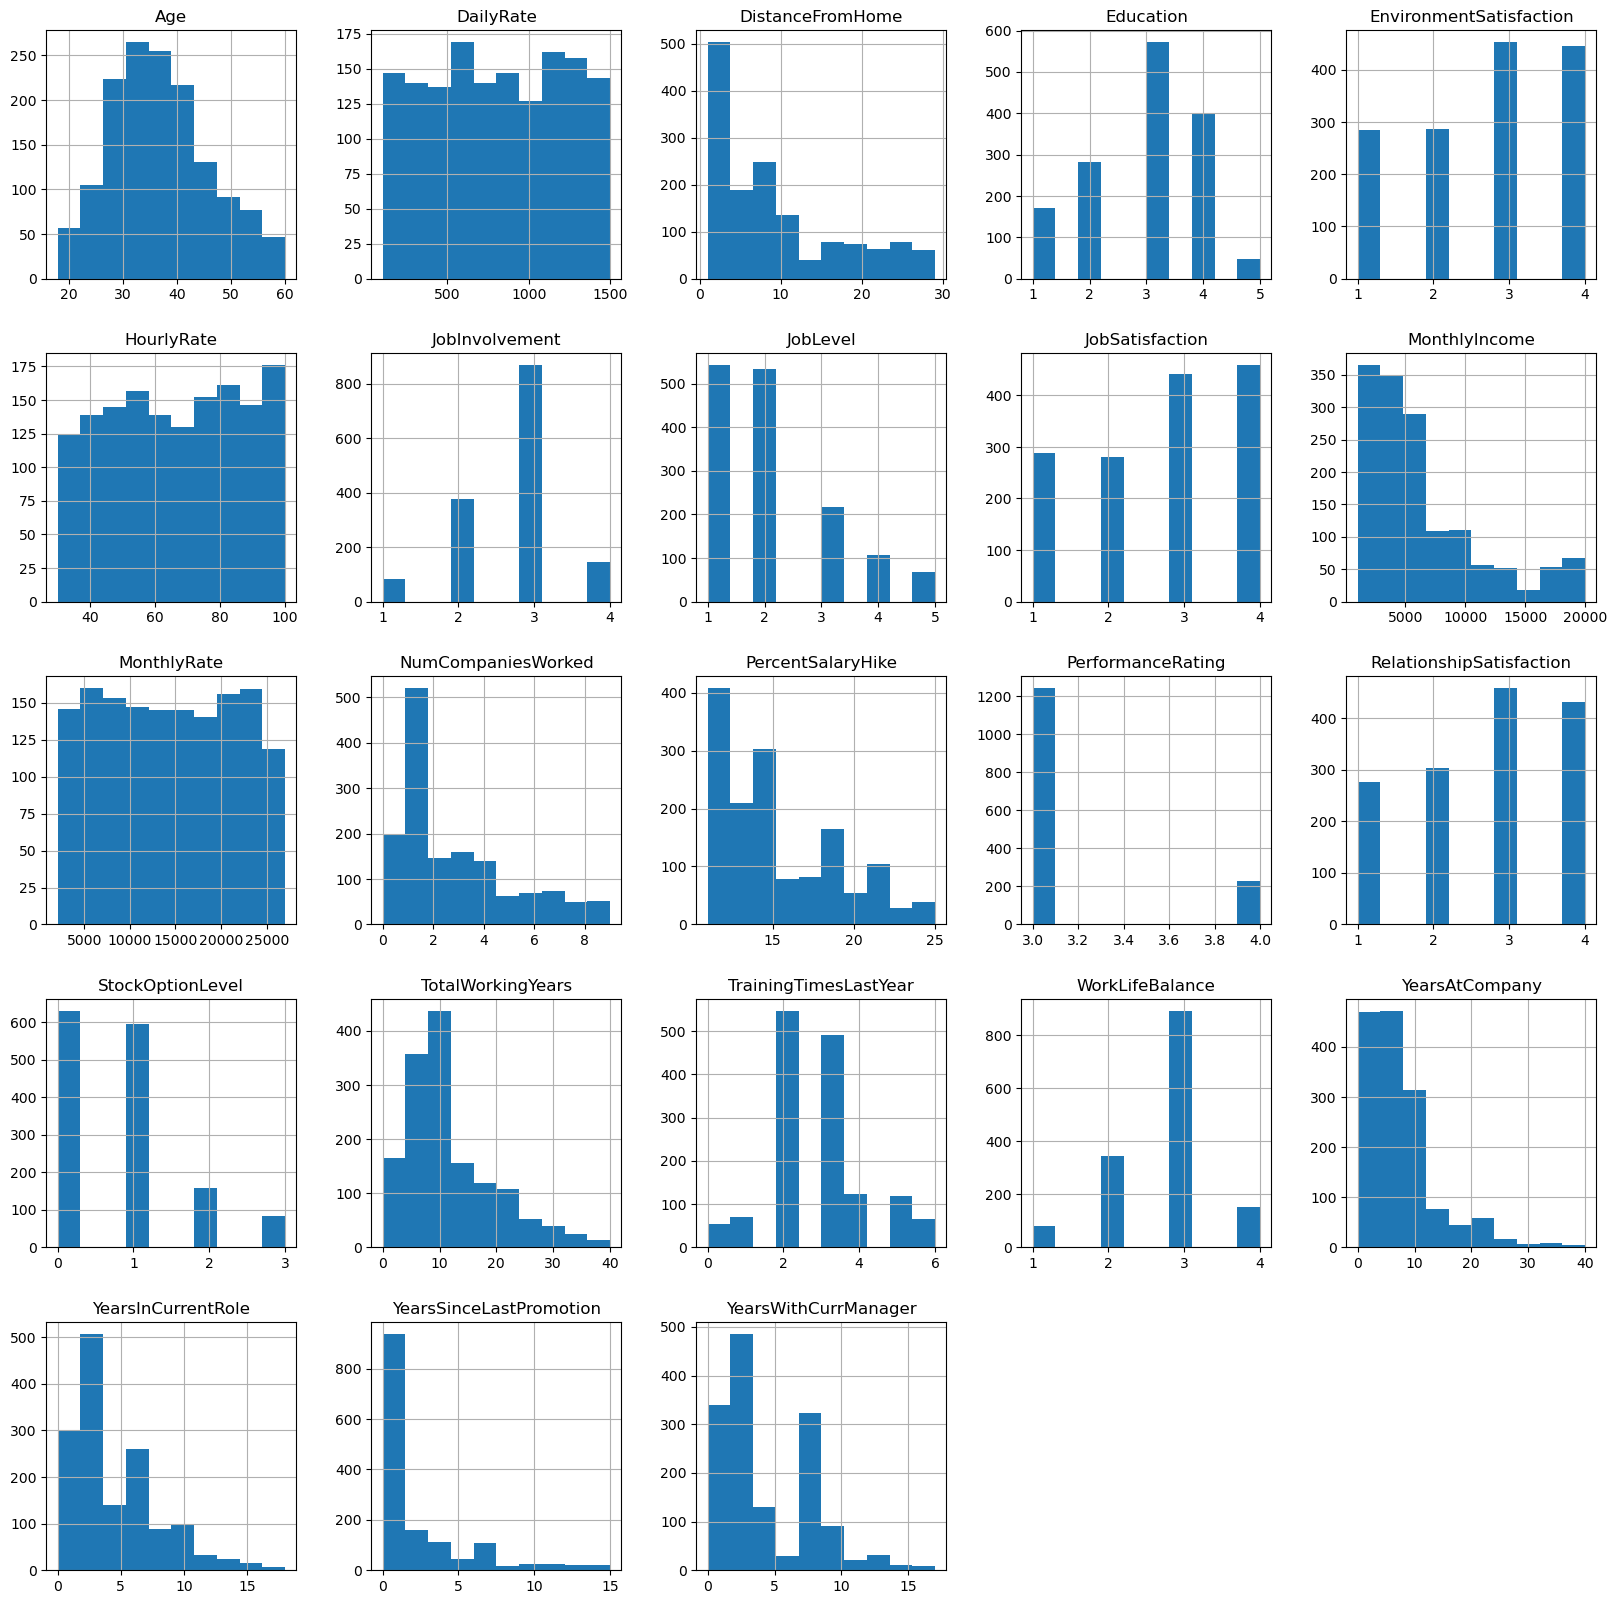

In [99]:
data_c1.hist(figsize=(20,20))
plt.show()

In [15]:
data_c1.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1470.000000    1470.000000  ...        1470.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102846    4707.956783  ...           0.360824   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8379.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

# Boxplot

In [36]:
data66=data_c1.select_dtypes(exclude=[object]).columns.tolist()

In [37]:
data66

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [103]:
def numerical(col_name):
    for col_name in data66:
        f,ax = plt.subplots(1,1, figsize=(18,6))
        sns.boxplot(y=col_name, x='Attrition',data=data_c1, palette='Set2')

C:\Users\bubbY\AppData\Local\Temp\ipykernel_1076\1242122947.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f,ax = plt.subplots(1,1, figsize=(18,6))


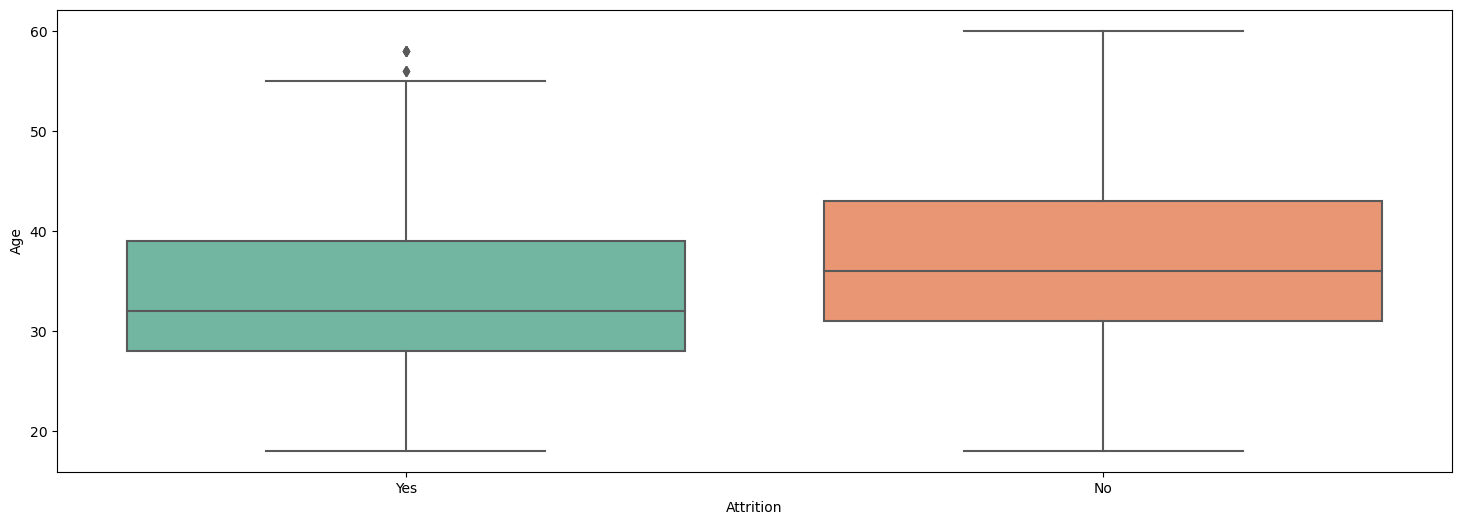

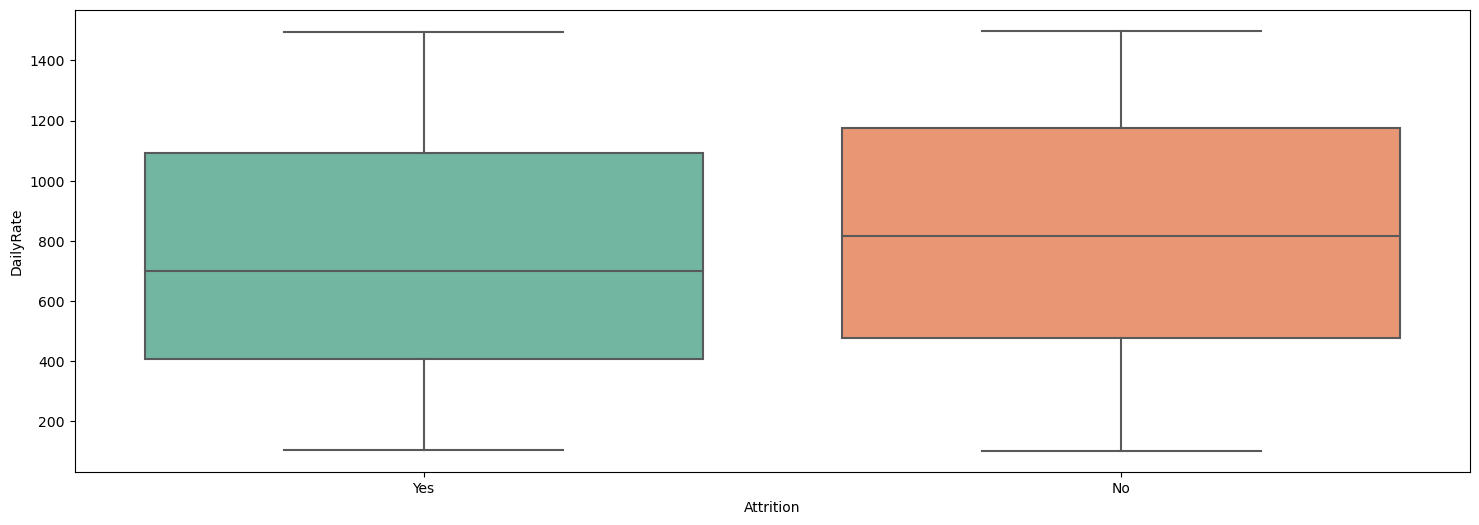

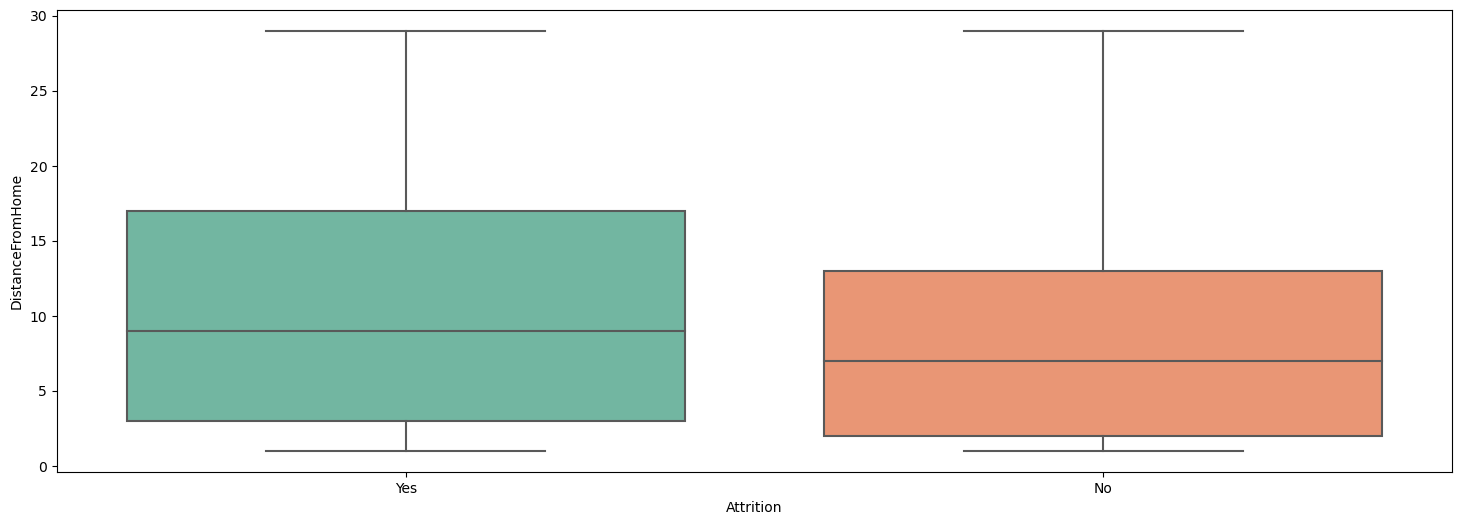

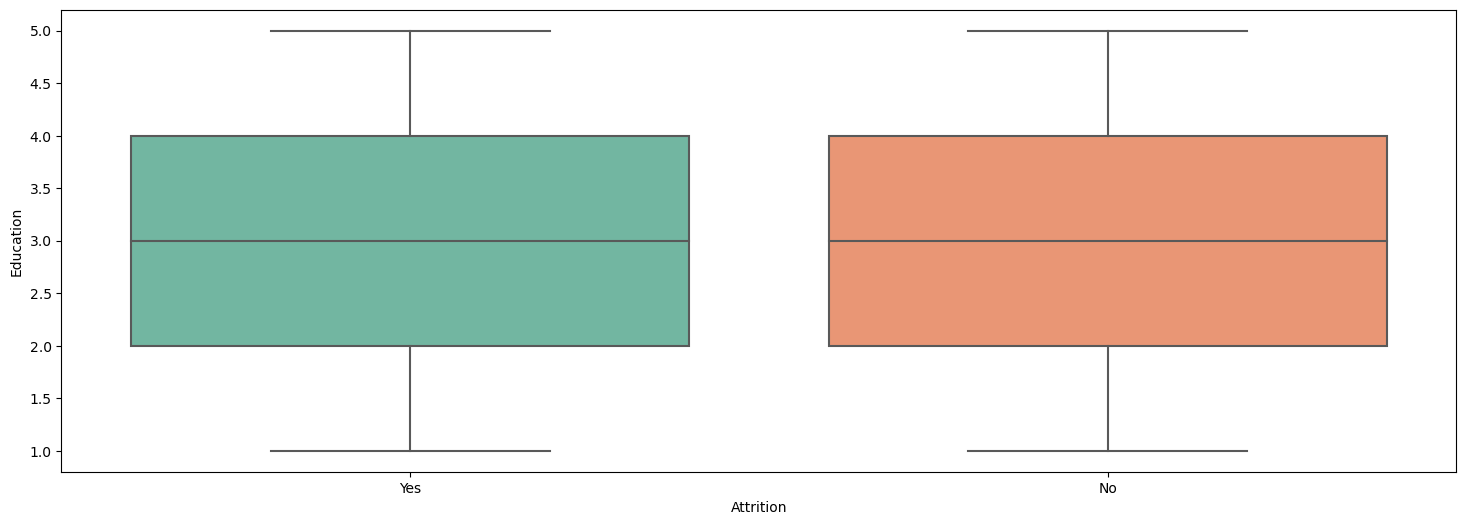

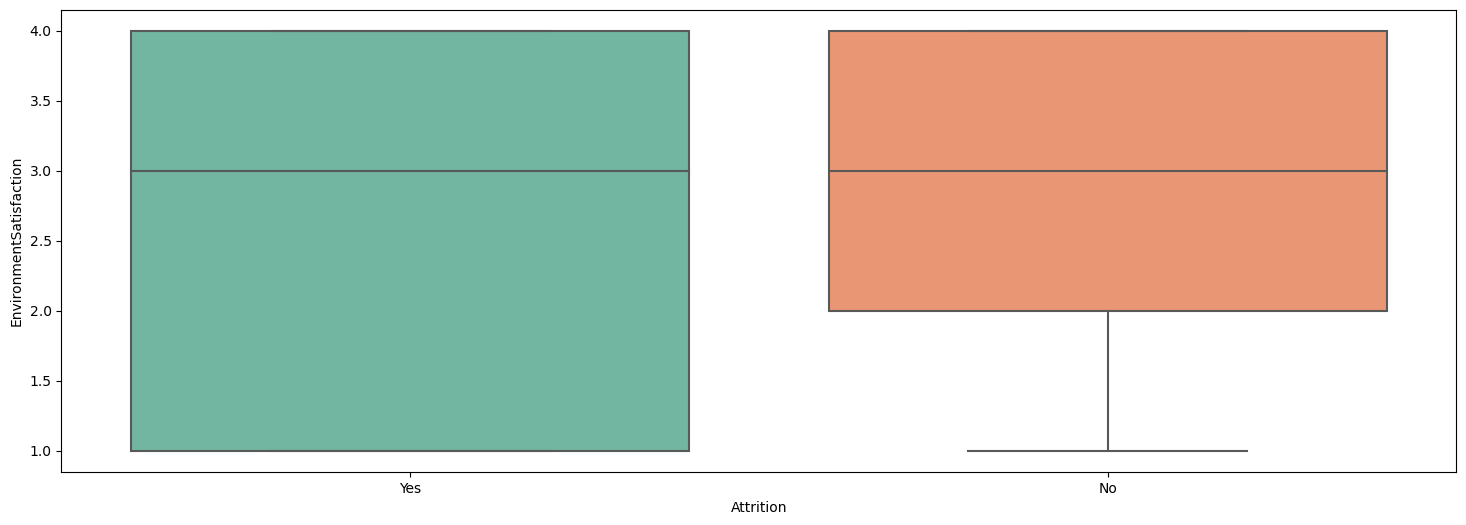

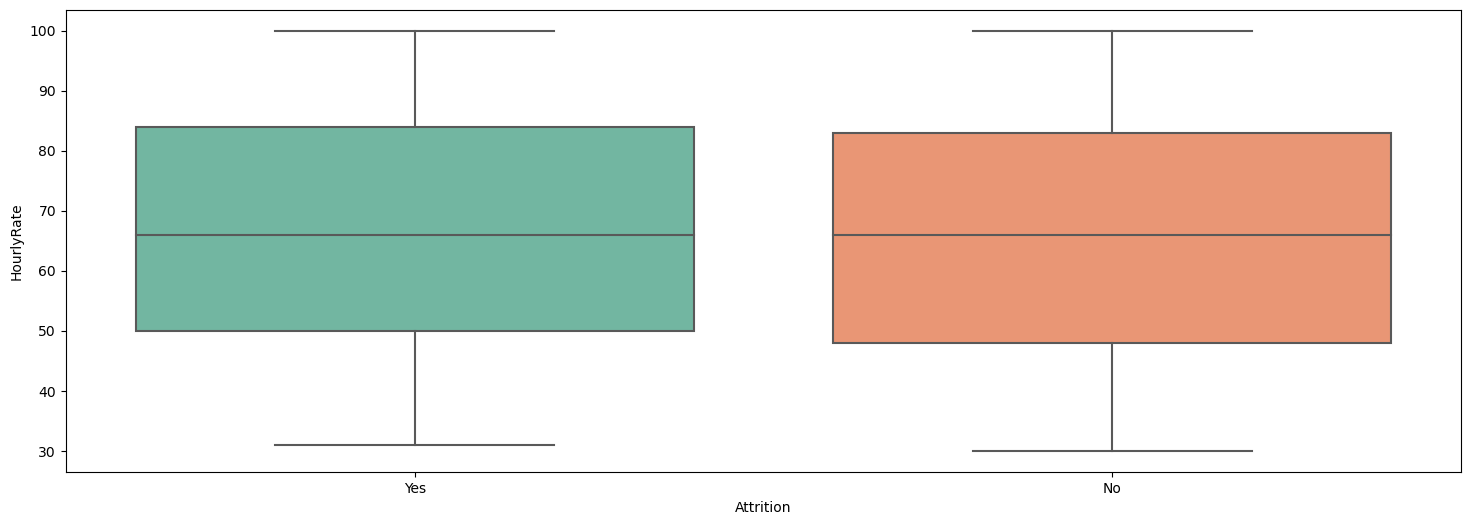

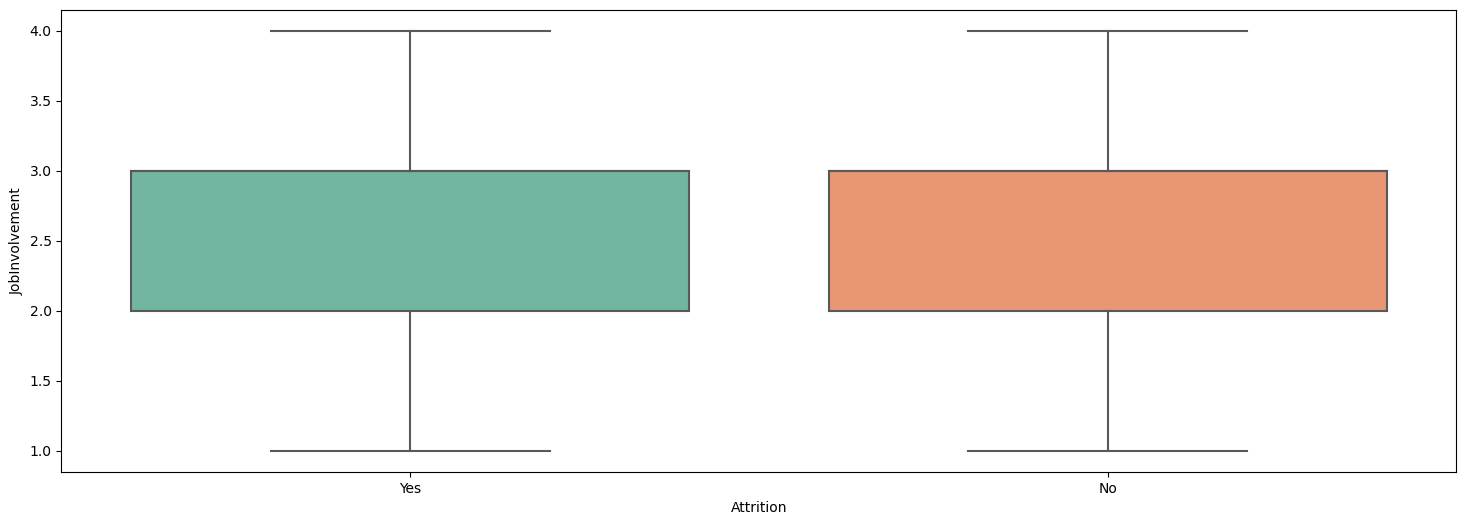

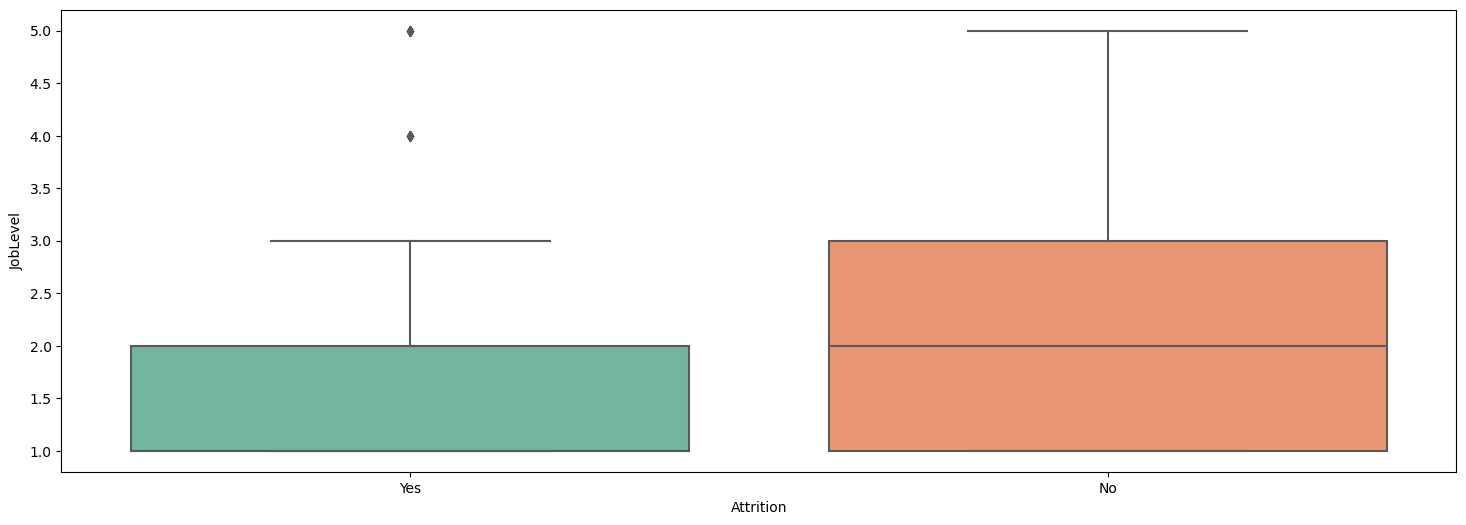

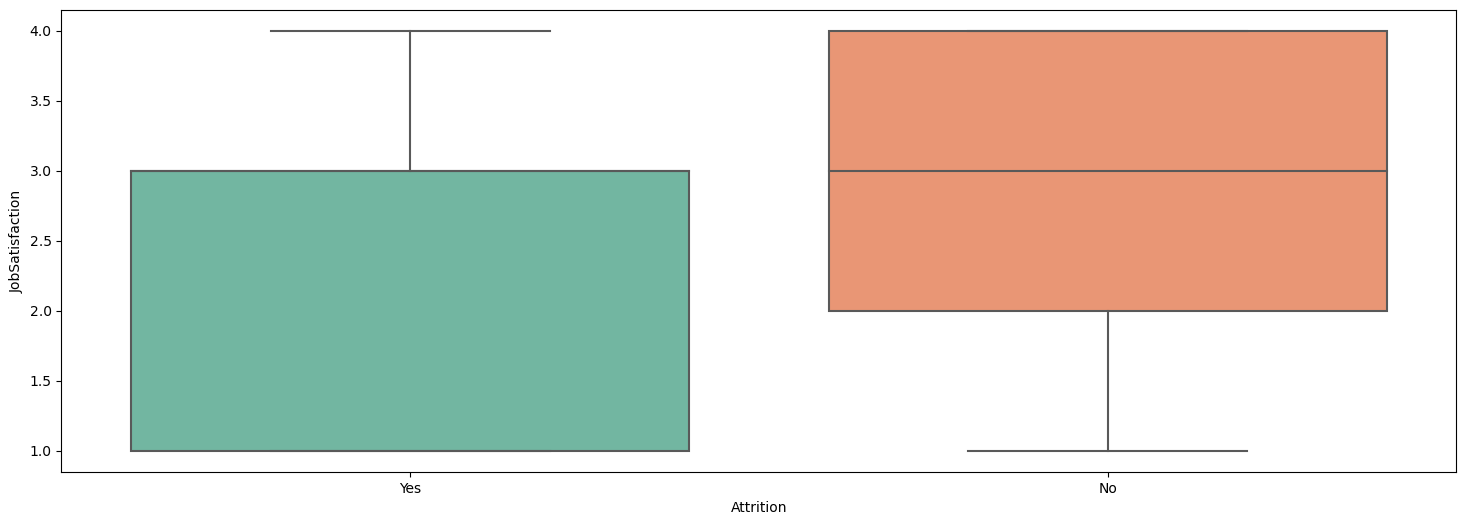

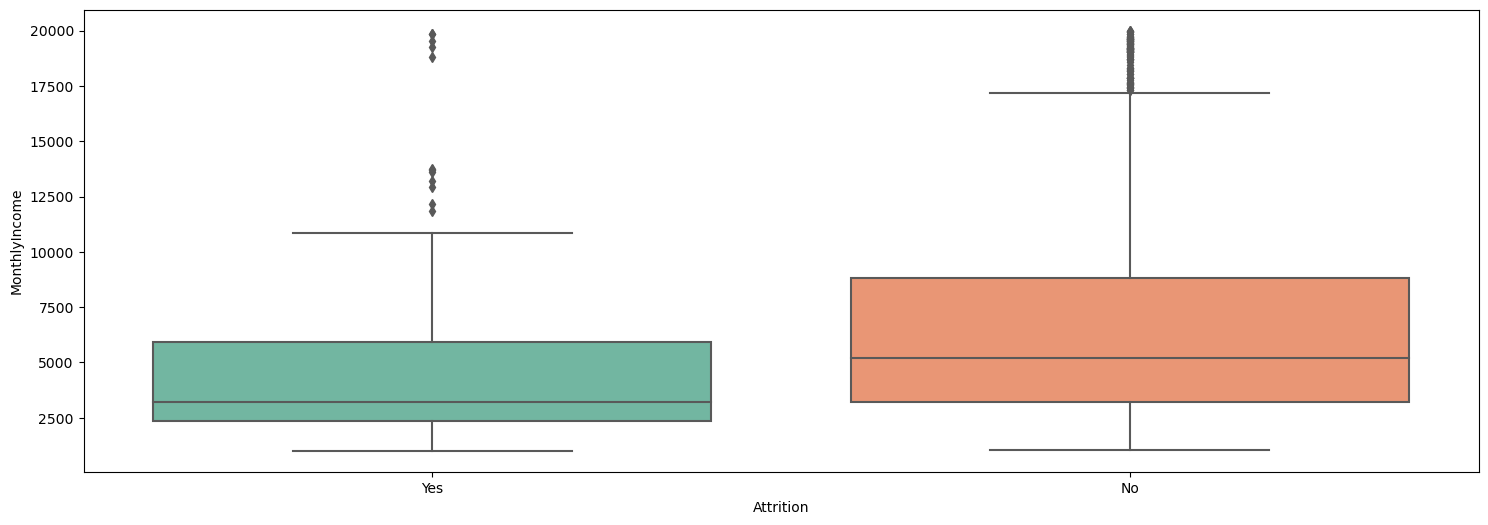

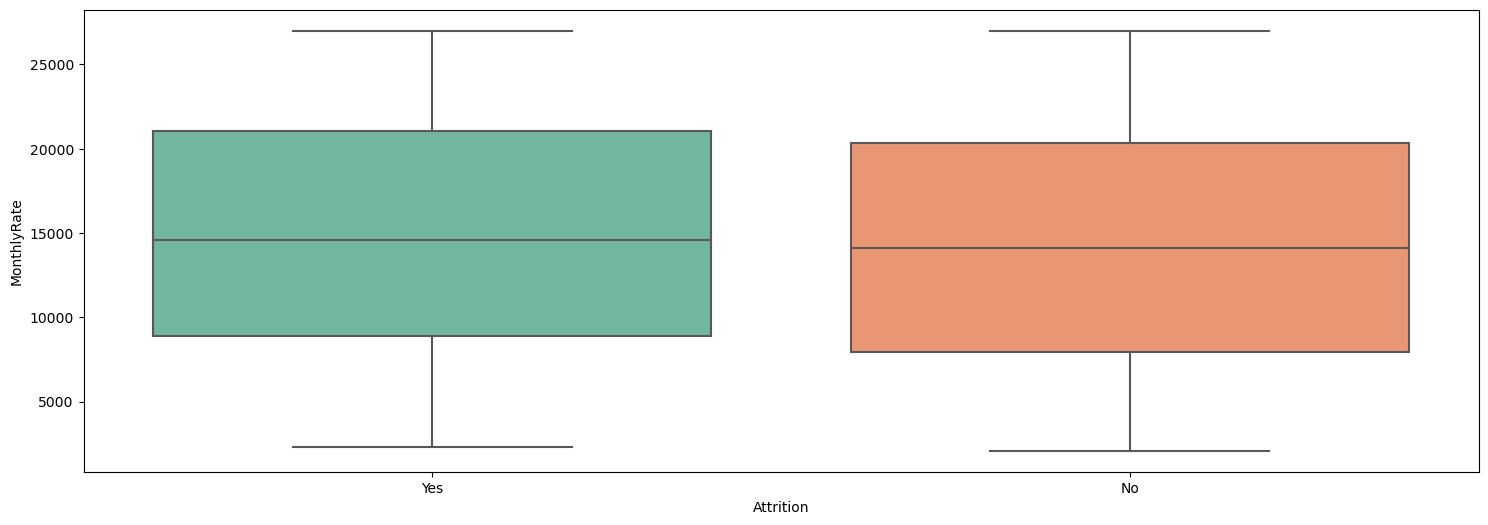

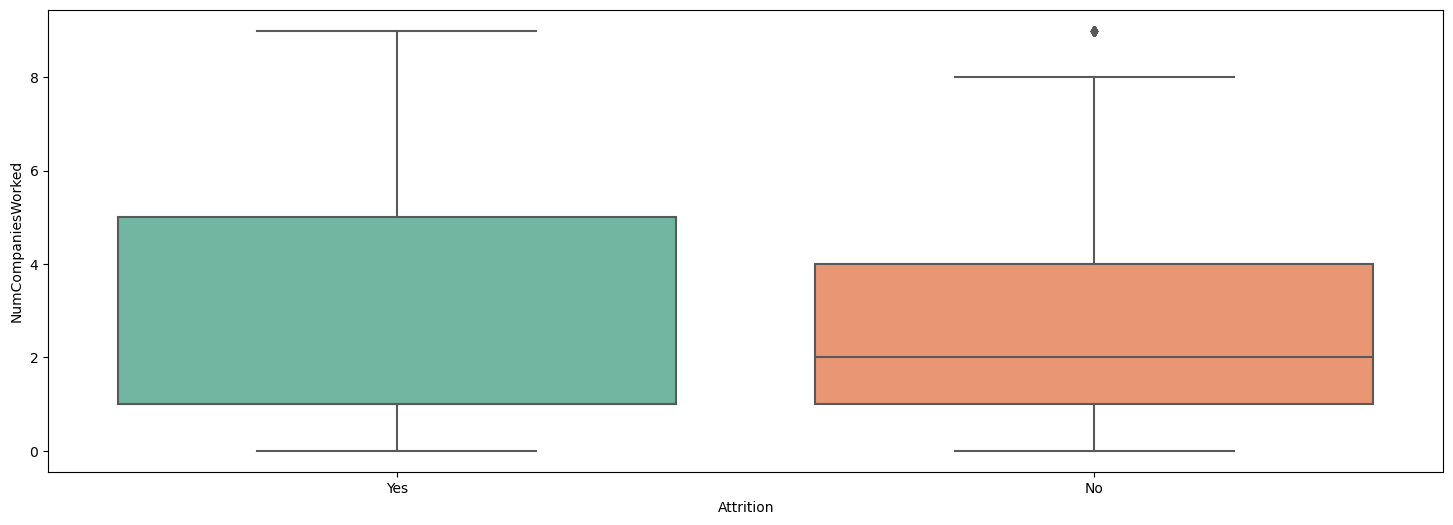

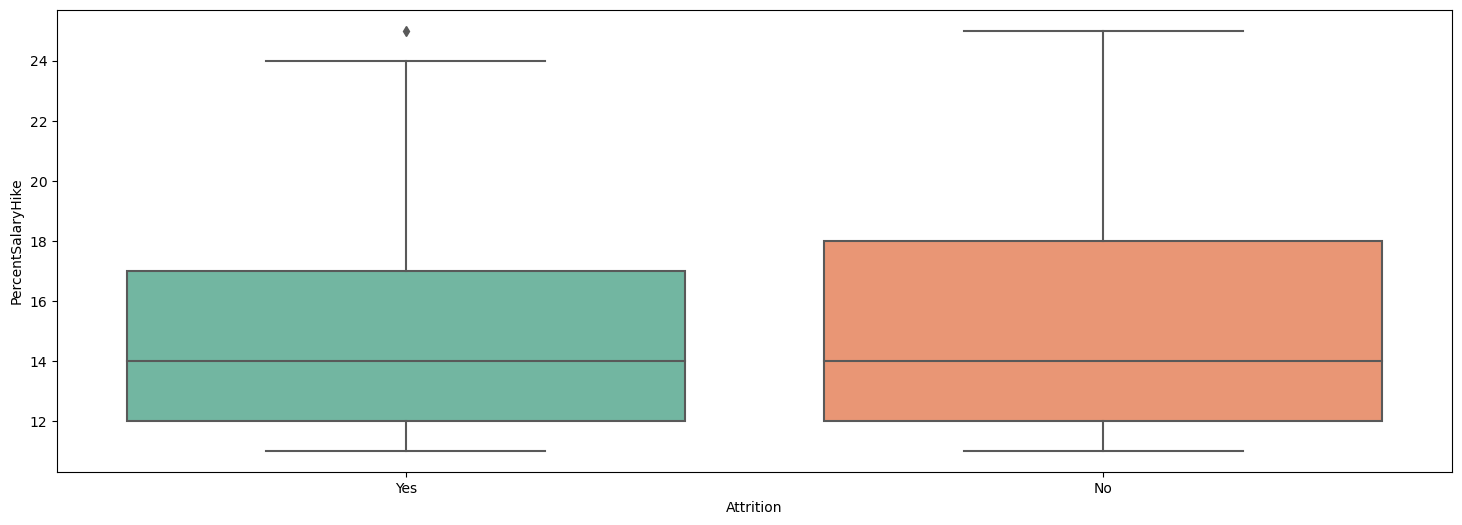

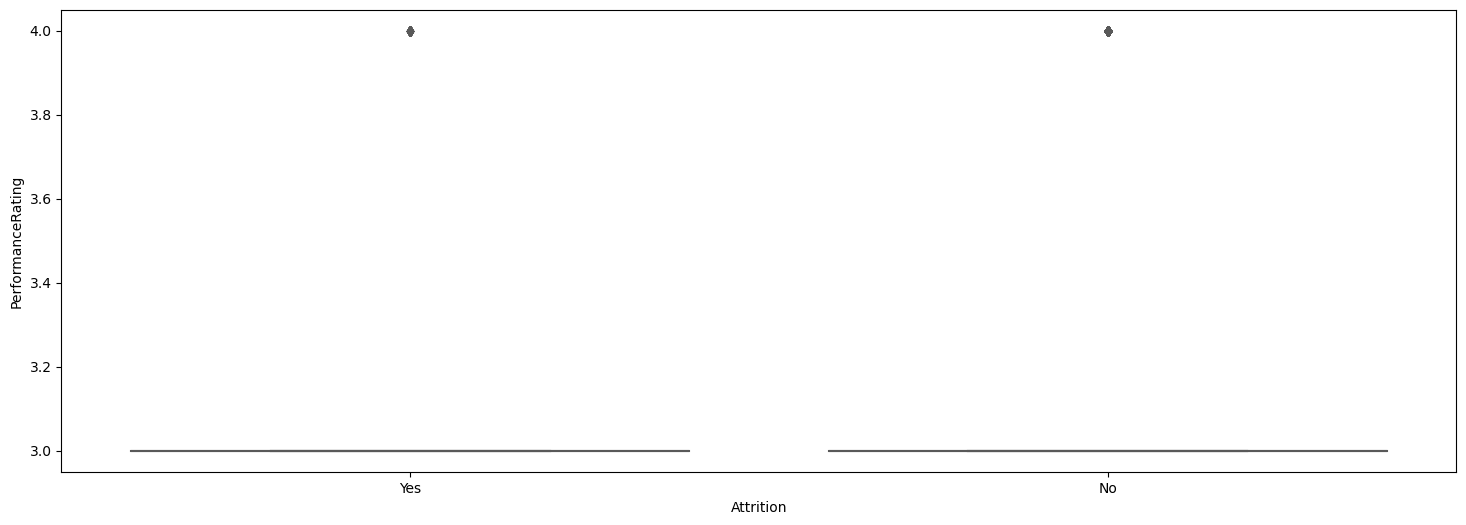

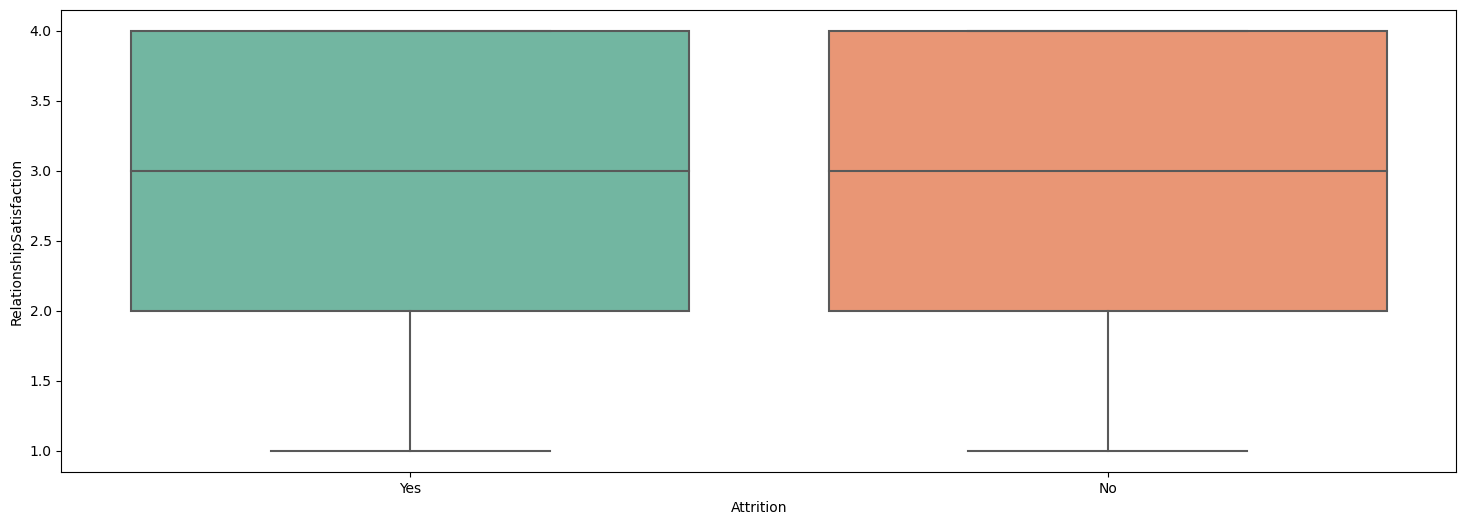

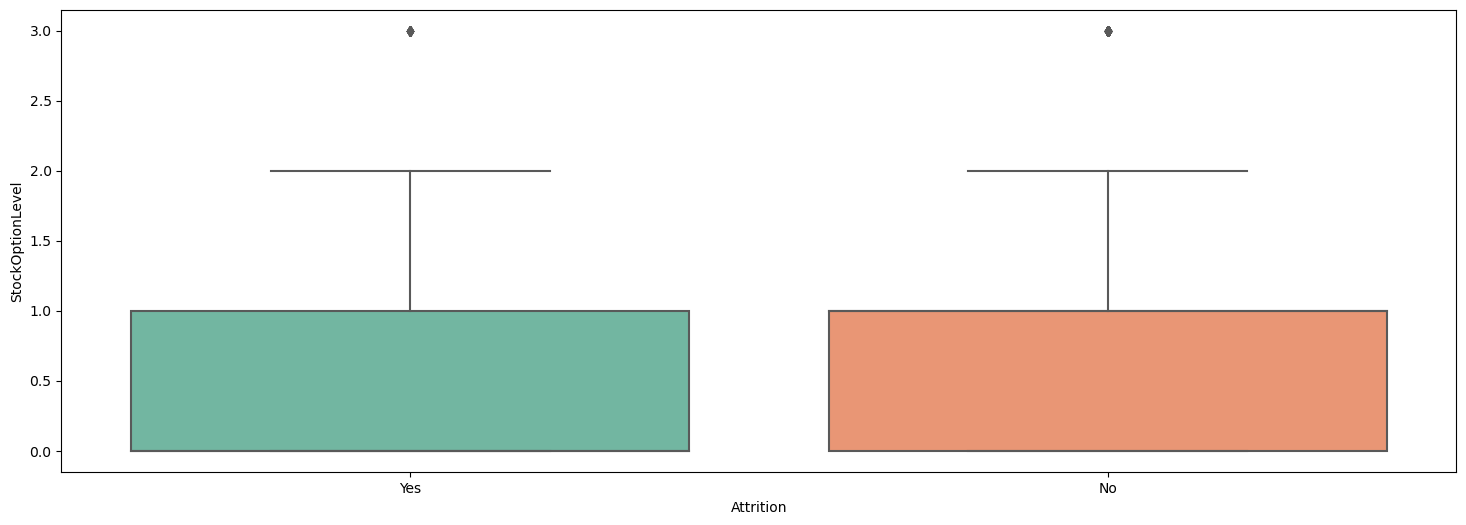

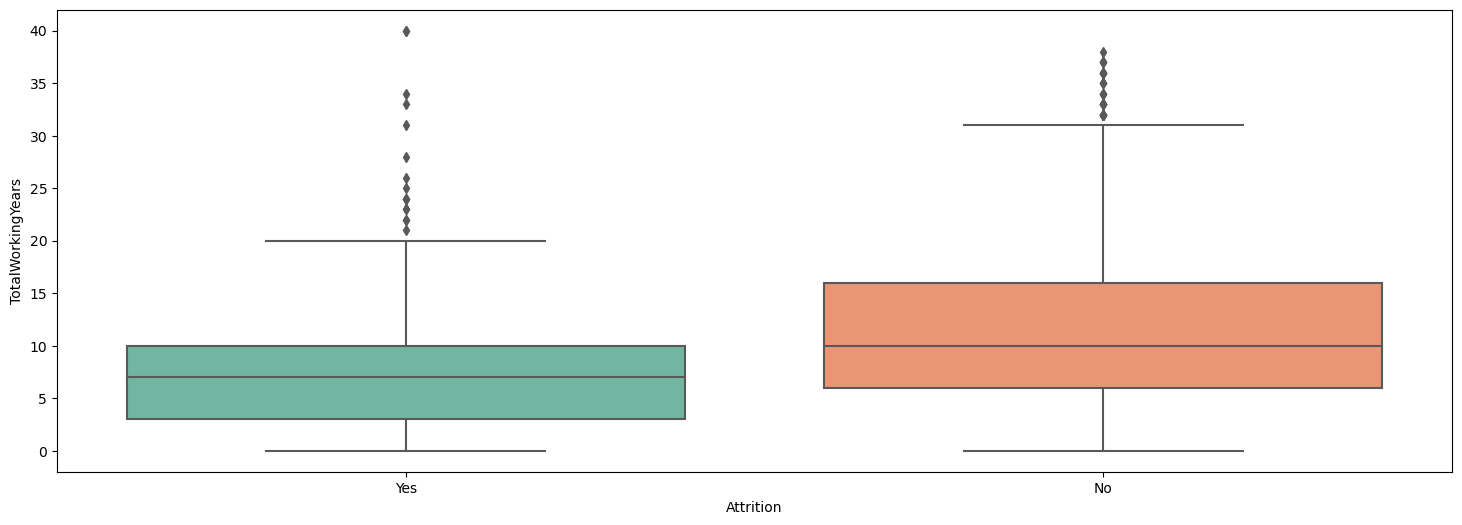

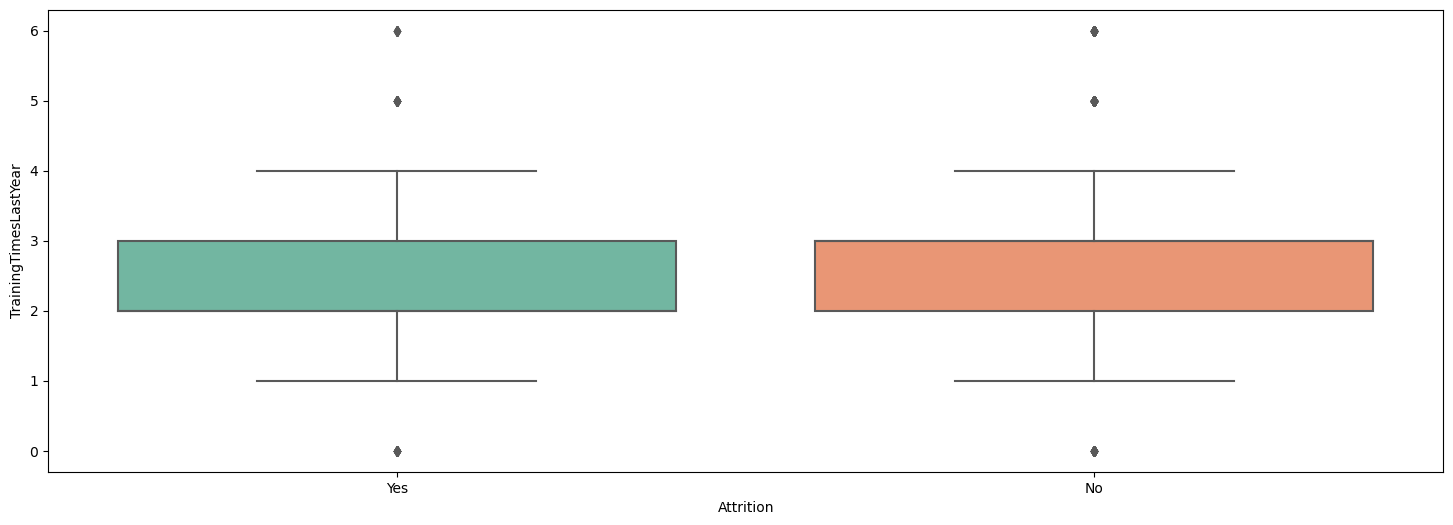

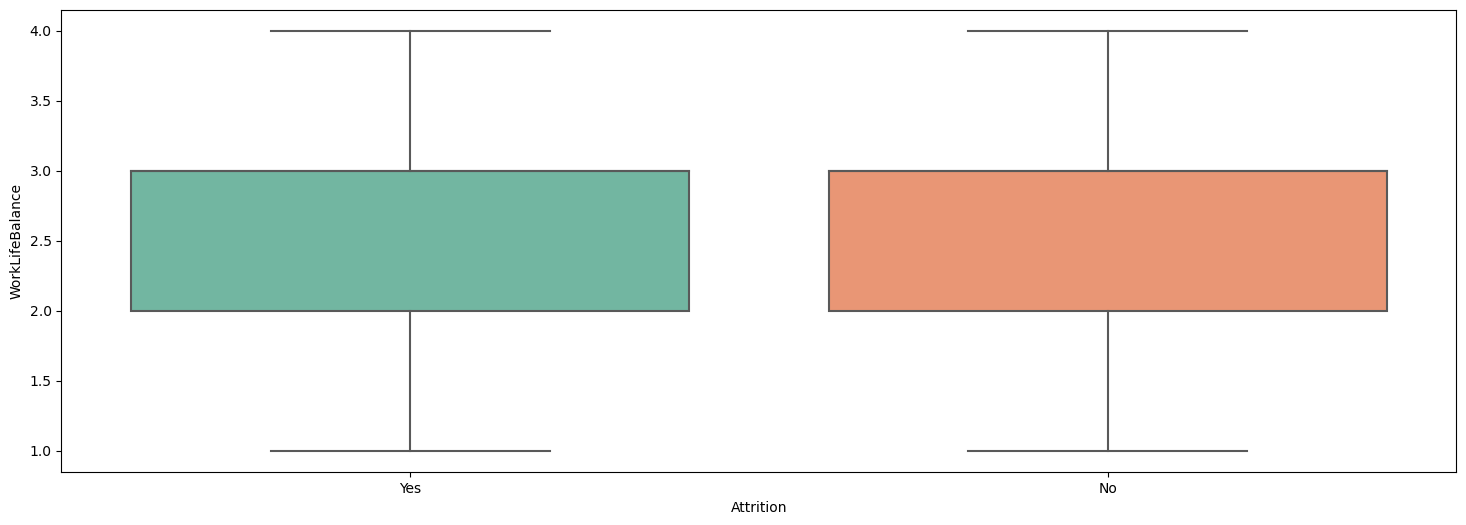

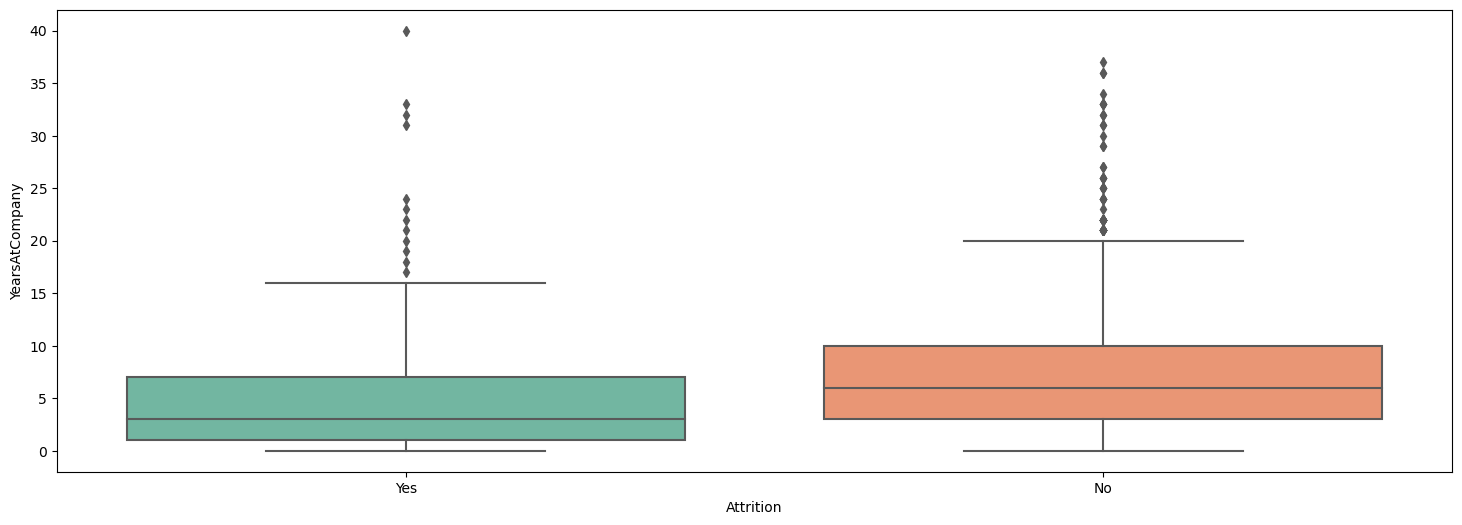

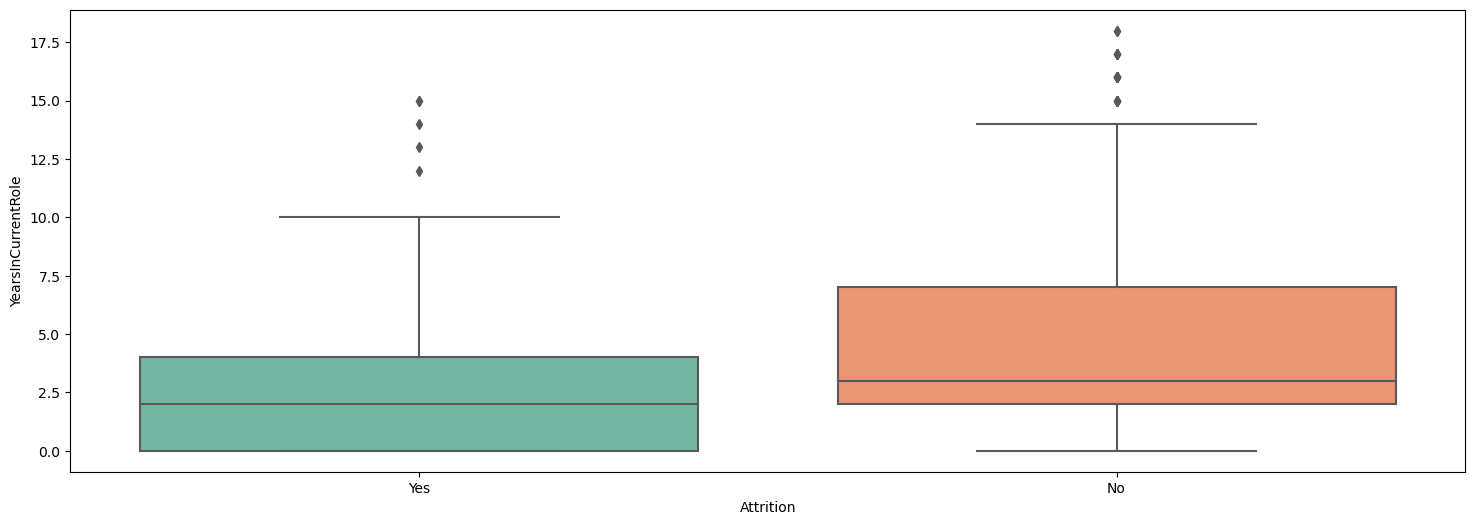

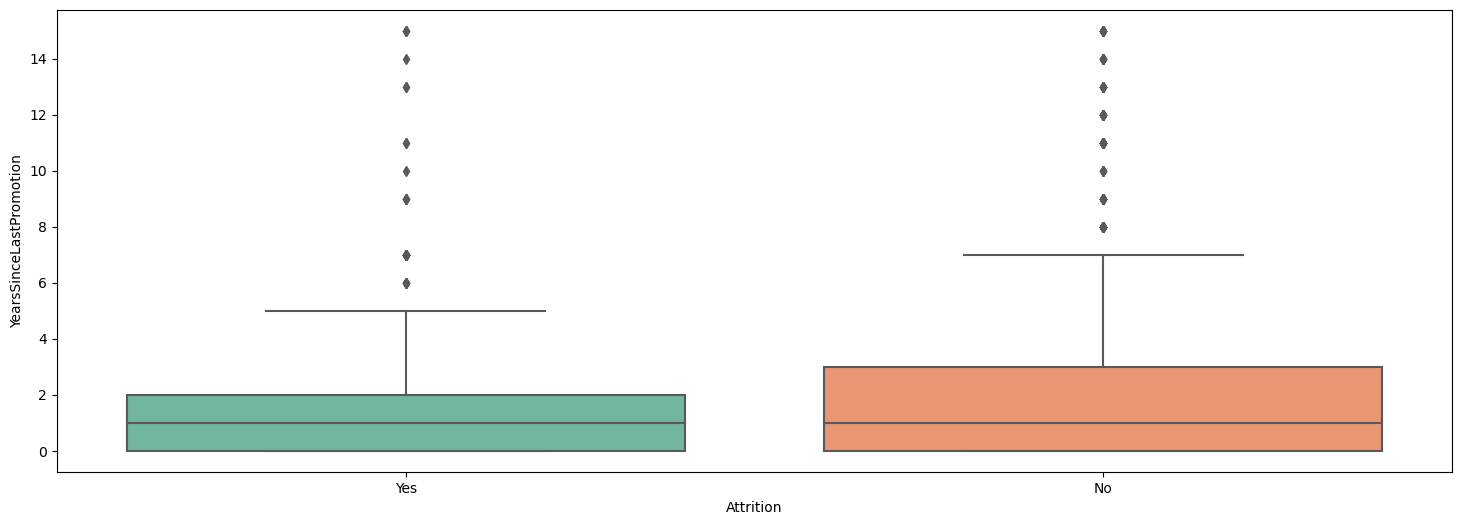

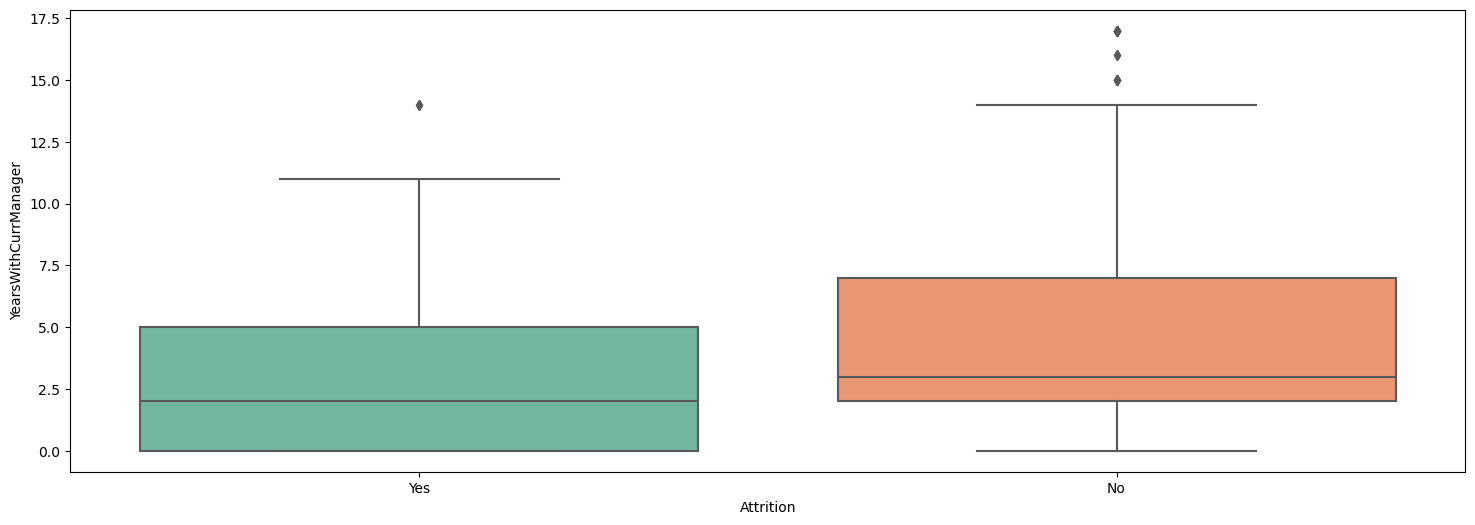

In [104]:
numerical('JobLevel')

# Skewness & Kurtosis

In [105]:
from scipy.stats import skew, kurtosis
data_numeric = data.apply(pd.to_numeric, errors='coerce')
skewness = data_numeric.apply(lambda x: skew(x))
kurtosis = data_numeric.apply(lambda x: kurtosis(x))

result = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print(result)


                          Skewness  Kurtosis
Age                       0.412864 -0.406851
Attrition                      NaN       NaN
BusinessTravel                 NaN       NaN
DailyRate                -0.003515 -1.203811
Department                     NaN       NaN
DistanceFromHome          0.957140 -0.228148
Education                -0.289385 -0.561294
EducationField                 NaN       NaN
EmployeeCount                  NaN       NaN
EmployeeNumber            0.016557 -1.223101
EnvironmentSatisfaction  -0.321326 -1.202513
Gender                         NaN       NaN
HourlyRate               -0.032278 -1.196412
JobInvolvement           -0.497911  0.265999
JobLevel                  1.024355  0.393717
JobRole                        NaN       NaN
JobSatisfaction          -0.329335 -1.222118
MaritalStatus                  NaN       NaN
MonthlyIncome             1.368419  0.997738
MonthlyRate               0.018559 -1.214906
NumCompaniesWorked        1.025423  0.006100
Over18    

C:\Users\bubbY\AppData\Local\Temp\ipykernel_1076\3917885513.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = data_numeric.apply(lambda x: skew(x))
C:\Users\bubbY\AppData\Local\Temp\ipykernel_1076\3917885513.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = data_numeric.apply(lambda x: kurtosis(x))


# Transformations

In [19]:
from sklearn.preprocessing import LabelEncoder  
count=0
for column in data_c1.columns:
    if data_c1[column].nunique() <= 2:
        encoder = LabelEncoder()
        data_c1[column] = encoder.fit_transform(data_c1[column])
        count+=1

print('{} columns were label encoded.'.format(count))

4 columns were label encoded.


In [20]:
data_c1= pd.get_dummies(data_c1, drop_first=True)

In [21]:
data_c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int32
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

# Outliers Using IQR

def outlier_treatment1(dataa):
    for col in dataa.columns:
        sorted(column)
        Q1,Q3 = np.percentile(dataa , [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        outliers = dataa[(dataa[column] < lower_range) | (dataa[column] > upper_range)]
        
        print(lower_range,upper_range)
        print(outliers)

In [111]:
def outlier_treatment(datacolumn): 
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])        #OUTLIERS FUNC. FOR INDIVIDUAL VARIABLES USING IQR
    IQR = Q3 - Q1                                               
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
 
    return lower_range,upper_range

In [112]:
outlier_treatment(data_c1['Age'])

(10.5, 62.5)

In [113]:
lower_bound,upper_bound = outlier_treatment(data_c1['Age'])

In [37]:
data_c1[(data_c1.Age < lower_bound) | (data_c1.Age > upper_bound)]

Empty DataFrame
Columns: [Age, Attrition, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, Department_Research & Development, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative, MaritalStatus_Married, MaritalStatus_Single]
Index: []

[0 rows x 45 columns]

In [114]:
outlier_treatment(data_c1['DistanceFromHome'])

(-16.0, 32.0)

In [84]:
lower_bound,upper_bound = outlier_treatment(data_c1['DistanceFromHome'])

In [85]:
data_c1[(data_c1.DistanceFromHome < lower_bound) | (data_c1.DistanceFromHome > upper_bound)]

Empty DataFrame
Columns: [Age, Attrition, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, Department_Research & Development, Department_Sales, EducationField_Life Sciences, EducationField_Marketing, EducationField_Medical, EducationField_Other, EducationField_Technical Degree, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative, MaritalStatus_Married, MaritalStatus_Single]
Index: []

[0 rows x 45 columns]

In [86]:
outlier_treatment(data_c1['TotalWorkingYears'])

(-7.5, 28.5)

In [87]:
lower_bound,upper_bound =outlier_treatment(data_c1['TotalWorkingYears'])

In [88]:
data_c1[(data_c1.TotalWorkingYears < lower_bound) | (data_c1.TotalWorkingYears > upper_bound)]

Age  Attrition  DailyRate  DistanceFromHome  Education  \
18     53          0       1219                 2          4   
62     50          0        989                 7          2   
85     56          0       1400                 7          3   
98     58          0        682                10          4   
105    59          0       1420                 2          4   
...   ...        ...        ...               ...        ...   
1264   55          0        478                 2          3   
1301   58          0        350                 2          3   
1331   48          0       1224                10          3   
1374   58          0        605                21          3   
1401   55          0        189                26          4   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
18                          1       0          78               2         4   
62                          2       0          43               2         5   
85                          4       1          49               1         3   
98                          4       1          37               3         4   
105                         3       0          32               2         5   
...                       ...     ...         ...             ...       ...   
1264                        3       1          60               2         5   
1301                        2       1          52               3         4   
1331                        4       1          91               2         5   
1374                        4       0          72               3         4   
1401                        3       1          71               4         5   

      ...  JobRole_Human Resources  JobRole_Laboratory Technician  \
18    ...                        0                              0   
62    ...                        0                              0   
85    ...                        0                              0   
98    ...                        0                              0   
105   ...                        0                              0   
...   ...                      ...                            ...   
1264  ...                        0                              0   
1301  ...                        0                              0   
1331  ...                        0                              0   
1374  ...                        0                              0   
1401  ...                        0                              0   

      JobRole_Manager  JobRole_Manufacturing Director  \
18                  1                               0   
62                  0                               0   
85                  0                               1   
98                  0                               0   
105                 1                               0   
...               ...                             ...   
1264                0                               0   
1301                1                               0   
1331                0                               0   
1374                1                               0   
1401                1                               0   

      JobRole_Research Director  JobRole_Research Scientist  \
18                            0                           0   
62                            1                           0   
85                            0                           0   
98                            0                           0   
105                           0                           0   
...                         ...                         ...   
1264                          1                           0   
1301                          0                           0   
1331                          1                           0   
1374                          0                           0   
1401                          0                           0   

      JobRole_Sal

# Visualization

Text(0.5, 1.0, 'Attrition count')

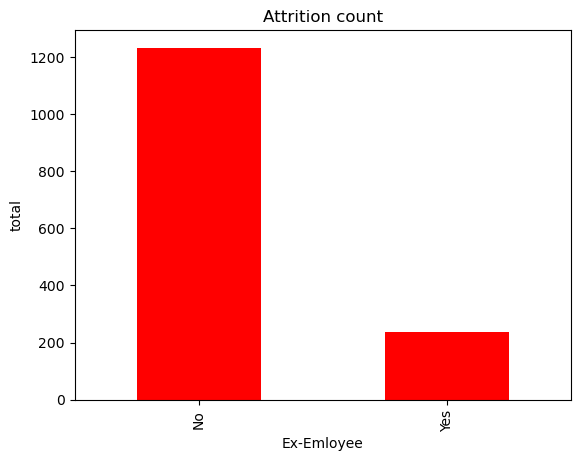

In [115]:
attrition_values=data['Attrition'].value_counts()
attrition_values.plot(kind='bar',color='r')
plt.xlabel('Ex-Emloyee')
plt.ylabel('total')
plt.title('Attrition count')

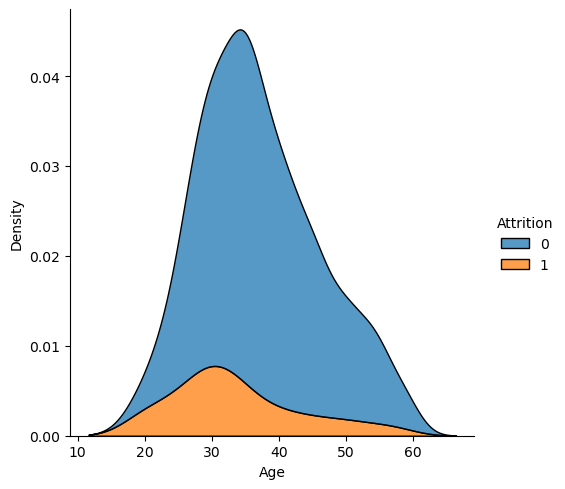

In [7]:
sns.displot(data=data_c1, x="Age",hue="Attrition", multiple='stack', kind='kde')

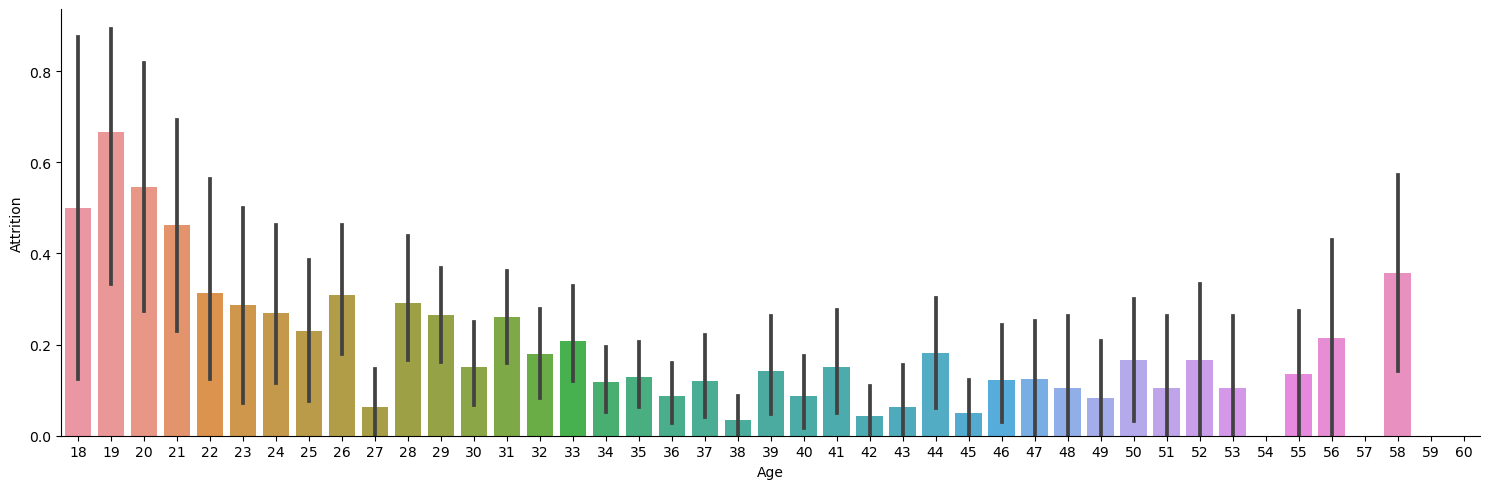

In [228]:
sns.factorplot(x = 'Age', y='Attrition', kind = 'bar', data=data_c1, aspect = 3) #younger people likely to leave more

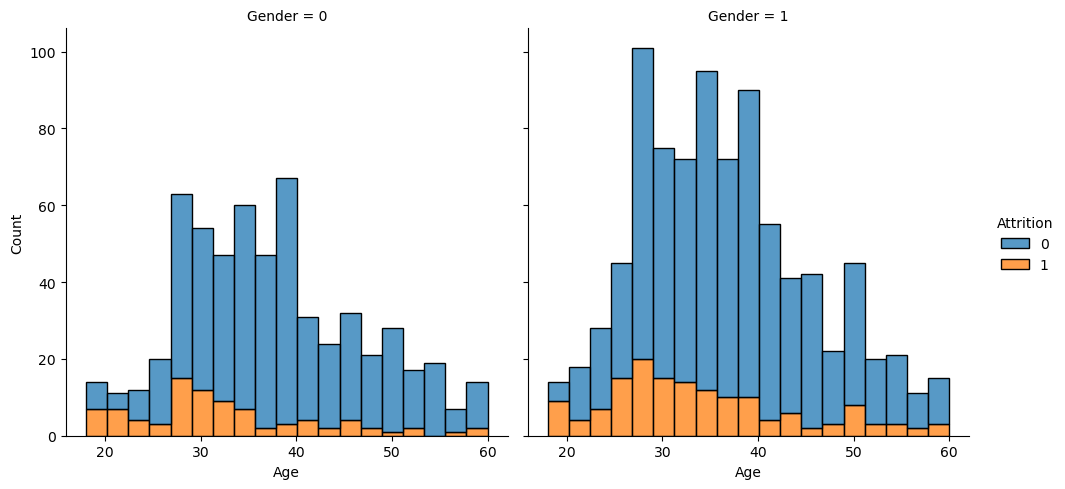

In [116]:
sns.displot(data=data_c1, x="Age",hue="Attrition",col="Gender",multiple="stack")

In [8]:
import webbrowser

In [9]:
#webbrowser.open('https://public.tableau.com/app/profile/k.neeraj.kumar/viz/Project_16869544117130/Sheet163#1')

True

# Over Sampling and Under Sampling

In [22]:
data_c3=data_c1

In [23]:
column_order=['Attrition','Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single']

In [24]:
data_c3=data_c3[column_order]

In [25]:
X = data_c3.iloc[:,1:]
Y = data_c3.iloc[:,0]

In [12]:
data_c9=data_c3.drop(["Attrition"],axis=1)

In [10]:
data_c3

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467              

In [160]:
data_c3['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [13]:
X = data_c9
Y = data_c3.iloc[:,1]

In [14]:
Y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [26]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, Y)
print(f"Oversampled: {Counter(y_over)}")
# now to combine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 1233, 1: 616})
Combined Random Sampling: Counter({0: 770, 1: 616})


In [27]:
y_combined_sampling.value_counts()

0    770
1    616
Name: Attrition, dtype: int64

In [28]:
X_combined_sampling

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      37        663                11          3                        2   
1      58        682                10          4                        4   
2      27       1131                15          3                        4   
3      52        258                 8          4                        3   
4      30        911                 1          2                        4   
...   ...        ...               ...        ...                      ...   
1381   41        906                 5          2                        1   
1382   55        436                 2          1                        3   
1383   35        130                25          4                        4   
1384   21       1334                10          3                        3   
1385   49       1475                28          2                        1   

      Gender  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  ...  \
0          1          47               3         3                4  ...   
1          1          37               3         4                3  ...   
2          0          77               2         1                1  ...   
3          0          54               3         1                1  ...   
4          1          76               3         1                2  ...   
...      ...         ...             ...       ...              ...  ...   
1381       1          95               2         1                1  ...   
1382       1          37               3         2                4  ...   
1383       0          96               3         1                2  ...   
1384       0          36               2         1                1  ...   
1385       1          97               2         2                1  ...   

      JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                           0                              0                0   
1                           0                              0                0   
2                           0                              0                0   
3                           0                              1                0   
4                           0                              1                0   
...                       ...                            ...              ...   
1381                        0                              0                0   
1382                        0                              0                0   
1383                        0                              0                0   
1384                        0                              1                0   
1385                        0                              1                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                  0                          1   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
1381                               0                          0   
1382                               0                          0   
1383                               0                          0   
1384                               0                          0   
1385                               0                          0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                              0                        0   
1                              0                        1   
2                              1                        0   
3                              0                        0   
4                              0                        0   
...         

# Normalization

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_col = list(X_combined_sampling.columns)
##data_col.remove('Attrition')
for col in data_col:
    X_combined_sampling[col] = X_combined_sampling[col].astype(float)
    X_combined_sampling[[col]] = scaler.fit_transform(X_combined_sampling[[col]])
##combined['Attrition'] = pd.to_numeric(combined['Attrition'], downcast='float')
X_combined_sampling

Age  DailyRate  DistanceFromHome  Education  \
0     0.452381   0.401146          0.357143       0.50   
1     0.952381   0.414756          0.321429       0.75   
2     0.214286   0.736390          0.500000       0.50   
3     0.809524   0.111032          0.250000       0.75   
4     0.285714   0.578797          0.000000       0.25   
...        ...        ...               ...        ...   
1381  0.547619   0.575215          0.142857       0.25   
1382  0.880952   0.238539          0.035714       0.00   
1383  0.404762   0.019341          0.857143       0.75   
1384  0.071429   0.881805          0.321429       0.50   
1385  0.738095   0.982808          0.964286       0.25   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                    0.333333     1.0    0.242857        0.666667      0.50   
1                    1.000000     1.0    0.100000        0.666667      0.75   
2                    1.000000     0.0    0.671429        0.333333      0.00   
3                    0.666667     0.0    0.342857        0.666667      0.00   
4                    1.000000     1.0    0.657143        0.666667      0.00   
...                       ...     ...         ...             ...       ...   
1381                 0.000000     1.0    0.928571        0.333333      0.00   
1382                 0.666667     1.0    0.100000        0.666667      0.25   
1383                 1.000000     0.0    0.942857        0.666667      0.00   
1384                 0.666667     0.0    0.085714        0.333333      0.00   
1385                 0.000000     1.0    0.957143        0.333333      0.25   

      JobSatisfaction  ...  JobRole_Human Resources  \
0            1.000000  ...                      0.0   
1            0.666667  ...                      0.0   
2            0.000000  ...                      0.0   
3            0.000000  ...                      0.0   
4            0.333333  ...                      0.0   
...               ...  ...                      ...   
1381         0.000000  ...                      0.0   
1382         1.000000  ...                      0.0   
1383         0.333333  ...                      0.0   
1384         0.000000  ...                      0.0   
1385         0.000000  ...                      0.0   

      JobRole_Laboratory Technician  JobRole_Manager  \
0                               0.0              0.0   
1                               0.0              0.0   
2                               0.0              0.0   
3                               1.0              0.0   
4                               1.0              0.0   
...                             ...              ...   
1381                            0.0              0.0   
1382                            0.0              0.0   
1383                            0.0              0.0   
1384                            1.0              0.0   
1385                            1.0              0.0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                0.0                        1.0   
1                                0.0                        0.0   
2                                0.0                        0.0   
3                                0.0                        0.0   
4                                0.0                        0.0   
...                              ...                        ...   
1381                             0.0                        0.0   
1382                             0.0                        0.0   
1383                             0.0                        0.0   
1384                             0.0                        0.0   
1385                             0.0                        0.0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                            0.0                      0.0   
1                            0.0                      1.0   
2                            1.0           

# Train and Test data splitting

In [30]:
target =y_combined_sampling.copy()

In [31]:
y_combined_sampling.value_counts()

0    770
1    616
Name: Attrition, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1039, 44)
y_train dataset:  (1039,)
X_test dataset:  (347, 44)
y_test dataset:  (347,)


# Cross Validation for multiple models

In [202]:
kfold = KFold(n_splits=10, random_state=22,shuffle=True)
xyz= []
accuracy = []
std = []
y_pred_list = []


classifiers = ['Logistic Regression','KNN','Decision Tree','Random Forest','SVM']

models = [LogisticRegression(solver='liblinear'),KNeighborsClassifier(),DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=100),SVC(gamma='auto', random_state=7)]

for i in models:
    model = i 
    cv_result =cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    y_pred = cross_val_predict(model, X_test, y_test, cv=10)
    y_pred_list.append(y_pred)
    cv_result =cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
    
    
    
new_model_data_frame =pd.DataFrame({'Cv Mean': xyz,
                                   'Std': std},
                                   index=classifiers)

new_model_data_frame

C:\Users\bubbY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bubbY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Cv Mean       Std
Logistic Regression  0.775756  0.046868
KNN                  0.721835  0.057017
Decision Tree        0.824795  0.033206
Random Forest        0.902829  0.032809
SVM                  0.759466  0.055838

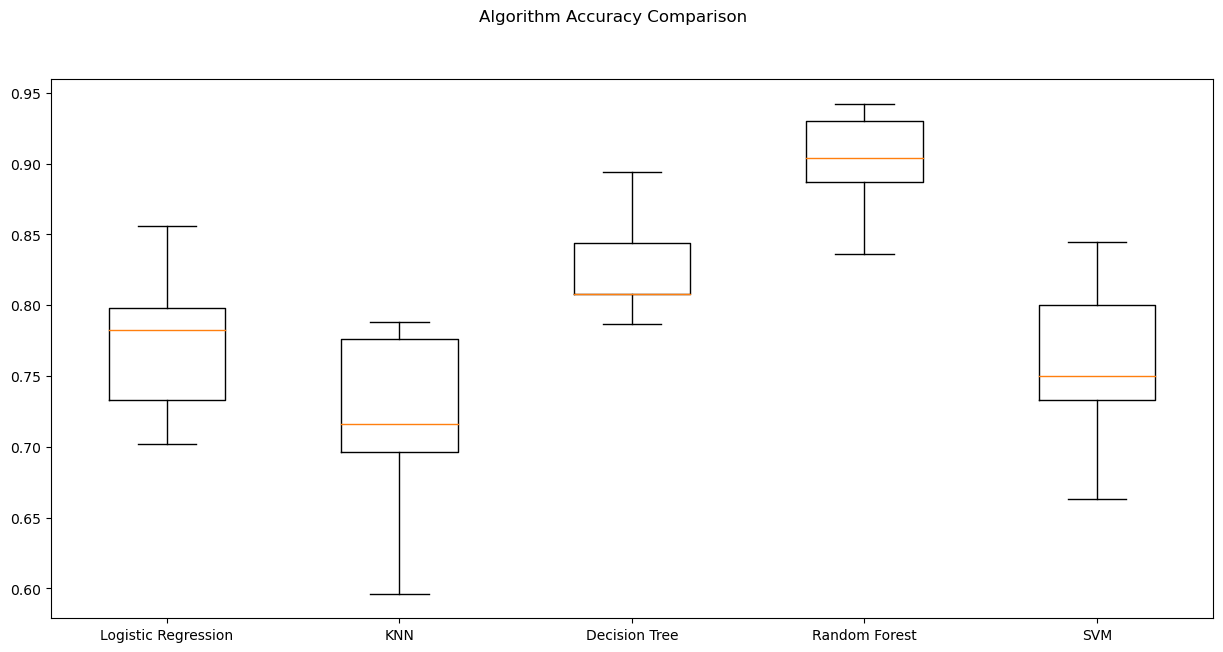

In [203]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(accuracy)
ax.set_xticklabels(classifiers)
plt.show()

# Logistic Regression

In [171]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [172]:
classifier.intercept_

array([1.16107])

In [173]:
classifier.coef_

array([[-0.60427658, -0.66403848,  1.01115777, -0.17174707, -1.16585296,
         0.259884  , -0.23246306, -1.86911886, -0.5026541 , -1.20096013,
        -0.16554763,  0.32295026,  1.05840619,  1.78505991, -0.17840222,
        -0.26499954, -0.73665015, -0.73702936, -0.6300062 , -0.63448951,
        -0.6229809 ,  1.14153067, -1.35572966,  2.03116262, -1.03586988,
         1.41016837,  0.92204911, -0.45429208,  0.38475649, -0.35644322,
        -0.11705673, -0.16685064, -0.2734763 ,  0.80221059,  0.99447046,
         1.33874149, -0.24631437, -0.14315613, -0.31208634,  0.06669798,
        -0.01705458,  0.94274675,  0.56312458,  0.97563792]])

In [174]:
y_pred = classifier.predict(X_test)

In [175]:
y_pred_df = pd.DataFrame({'actual': y_test,
                          # 'prob': classifier.predict_proba(X)[:,1],
                         'predicted': classifier.predict(X_test)})

In [176]:
y_pred_df

actual  predicted
475        0          1
960        1          1
1043       1          1
1283       1          0
537        0          1
...      ...        ...
1207       1          1
968        1          1
704        0          0
438        0          0
1109       1          1

[347 rows x 2 columns]

In [177]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']
display(y_pred_df)
y_pred_df['correct'].mean()

actual  predicted  correct
475        0          1    False
960        1          1     True
1043       1          1     True
1283       1          0    False
537        0          1    False
...      ...        ...      ...
1207       1          1     True
968        1          1     True
704        0          0     True
438        0          0     True
1109       1          1     True

[347 rows x 3 columns]

0.7780979827089337

[[165  28]
 [ 52 102]]


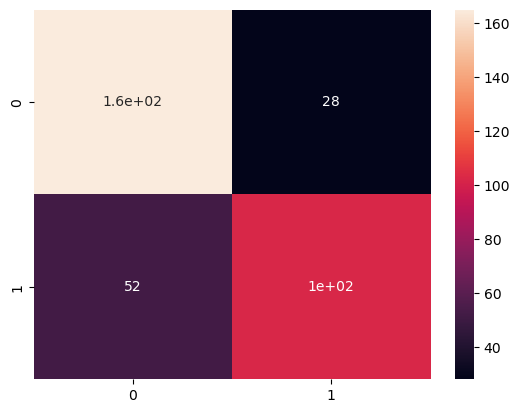

In [205]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, annot=True)
print (confusion_matrix)

# Classification Report

In [179]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       193
           1       0.75      0.76      0.75       154

    accuracy                           0.78       347
   macro avg       0.78      0.78      0.78       347
weighted avg       0.78      0.78      0.78       347



# ROC Curve

Text(0, 0.5, 'True Positive Rate')

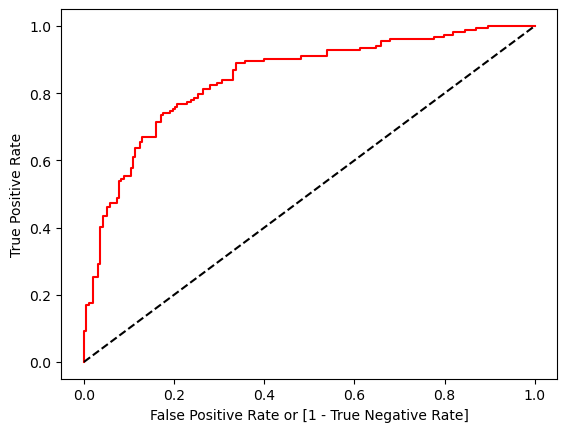

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [181]:
auc

0.7762431868649486

# Random Forest classifier

In [45]:
num_trees = 178
max_features = 1
kfold = KFold(n_splits=20, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9268099547511313


In [49]:
##model_gini = DecisionTreeClassifier(criterion='entropy',max_depth=23, random_state=7)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=178)

In [46]:
results

array([0.90384615, 0.92307692, 0.98076923, 0.96153846, 0.92307692,
       0.94230769, 0.96153846, 0.96153846, 0.92307692, 0.94230769,
       0.86538462, 0.90384615, 0.90384615, 0.96153846, 0.90384615,
       0.94230769, 0.94230769, 0.86538462, 0.94230769, 0.88235294])

In [50]:
preds2 = model.predict(X_test) # predicting on test data set 
pd.Series(preds2).value_counts()

0    208
1    139
dtype: int64

In [51]:
pd.crosstab(y_test,preds2)

col_0        0    1
Attrition          
0          188    5
1           20  134

In [52]:
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       193
           1       0.96      0.87      0.91       154

    accuracy                           0.93       347
   macro avg       0.93      0.92      0.93       347
weighted avg       0.93      0.93      0.93       347



# Decision Tree Classifier

In [33]:

model_gini = DecisionTreeClassifier(criterion='entropy',max_depth=23, random_state=7)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=23, random_state=7)

In [34]:
pred=model_gini.predict(X_test)
np.mean(pred==y_test)

0.8674351585014409

In [36]:
from sklearn import tree


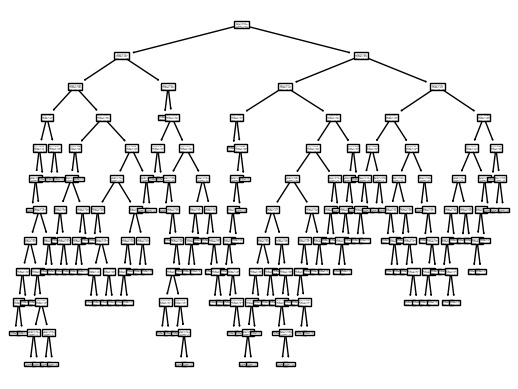

In [37]:
tree.plot_tree(model_gini);

In [38]:
y_train.value_counts()

0    577
1    462
Name: Attrition, dtype: int64

In [47]:
preds1 = model_gini.predict(X_test) # predicting on test data set 
pd.Series(preds1).value_counts()

1    174
0    173
dtype: int64

In [42]:
pd.crosstab(y_test,preds)

col_0        0    1
Attrition          
0          160   33
1           13  141

In [44]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       193
           1       0.81      0.92      0.86       154

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347



# Grid search for Random Forest

In [217]:
trees=np.array(range(1,200))
maxft=np.array(range(1,5))
param_grid=dict(n_estimators=trees,max_features=maxft)
model=RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4]),
                         'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 

In [218]:
print(grid.best_score_)
print(grid.best_params_)

0.9056670382757339
{'max_features': 1, 'n_estimators': 178}


# Grid search for Decision tree

In [186]:
criterias=["entropy","gini"]

In [211]:
criteria=criterias
maxx=np.array(range(1,35))
crs=np.array(range(1,30))
random=np.array(range(1,30))
param_grid=dict(criterion=criterias,max_depth=maxx,random_state=random)
model=DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [213]:
print(grid.best_score_)
print(grid.best_params_)

0.8896137963275589
{'criterion': 'entropy', 'max_depth': 13, 'random_state': 17}
